# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here

**Problem Statement** :

The number of retaurants in New York is increasing day by day. The busy professionals and students usually buy the food from these restaurants due to there hectic lifestyle. Now , these people can order food online via a single smartphone app because this way they can enjoy the food from there favourite restaurants.

As soon as the restaurant receives the order and confirms the order, app assigns a delivery partner. The delivery partner reaches the restaurant and waits for the food package.As soon as the food package is handed over, the delivery partner notifies the same on the app and delivers the package to the customer and notifies the drop-off in the app. The customer can rate the service in the app and the company earns by collecting a fixed margin on the order from the restaurants.

**Objectives** :

As a Data Scientist, the aim here is to analyse the data that the company will share of the users that are registered on the online portal. This will help to generate insights and business recommendations to know which restaurants (based on the demand) are more preferred by users , eventually enhancing the user experience and business outcomes.



### Data Dictionary

Mention the data dictionary here

The company has the following parameters with which analysis needs to be performed :-

1) order_id: Unique ID of the order

2) customer_id: ID of the customer who ordered the food

3) restaurant_name: Name of the restaurant

4) cuisine_type: Cuisine ordered by the customer

5) cost_of_the_order: Cost of the order

6) day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

7) rating: Rating given by the customer out of 5

8) food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

9) delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries

In [843]:
# Necessary libraries imported here
# Pandas is required for data manipulation
# Numpy is required for scientific calculation and matrix operations
# Seaborne and matplotlib are required for data visualization
# Squarify is required for plotting the square plots based on frequency
!pip install squarify
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify as sq

### Understanding the structure of the data

In [844]:
# uncomment and run the following lines for Google Colab
# Mounting the drive to access it within google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [845]:
# Write your code here to read the data
# read_csv function is used to read the data as a dataframe in google colab for further processing
df = pd.read_csv("/content/drive/MyDrive/foodhub_order.csv")

In [846]:
# Write your code here to view the first 5 rows
# The head function is used to check if data has been read correctly; by default the head function shows the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [847]:
# Write your code here
# The attribute of shape which is available for dataframes is used for viewing the dataframe size in terms of number of rows and columns
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset as specified by the shape attribute.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [848]:
# Write your code here
# This function is used for viewing the data-types, column containing number of non-missing/non-null values in each column and total rows across the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


## Observations :
1) There are total 9 columns in the dataset
2) There are four columns with datatype as integer, single column with datatype as float and four columns with datatype as float.
3) order_id , customer_id , food_preparation_time and delivery_time has the datatype as integer
4) restaurant_name, cuisine_type , day_of_the_week , rating has the datatype as object
5) cost_of_the_order has the datatype as float.
6) Rating column should have the datatype as numeric but it is categorical , this needs to be investigated.
7) The total memory required for this data is 133.6+ KB

In [849]:
# Investigating the rating column and its data-type since the data-type should be numeric but its categorical
df['rating'].value_counts()


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

## Observation :
1) There are 736 values for which rating is "Not given". These values needs to be treated since they do not contain any value
2) There are 588 values where rating value is 5
3) There are 386 values where rating value is 4
4) There are 188 values where rating value is 3

In [850]:
# Replace the "Not given" rating value with NaN for further processing
df['rating'] = df['rating'].replace('Not given',np.nan)

In [851]:
# Testing the rating column such that "Not given" values have been replaced with the NaN values
df['rating']

0       NaN
1       NaN
2         5
3         3
4         4
       ... 
1893      5
1894      5
1895    NaN
1896      5
1897    NaN
Name: rating, Length: 1898, dtype: object

In [852]:
# Converting the rating columns datatype to numeric with error handling in case of non-numeric entity getting converted to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [853]:
# Checking the datatype to confirm the data-type conversion of the rating column from object to numeric form
df['rating'].dtype

dtype('float64')

### Observations:
1) The data-type of the rating column has been converted to float data-type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [854]:
# To check the missing values , value_counts() needs to be used for the order_id column
missing_value_counts_order_id = df['order_id'].value_counts()
print("Missing values counts of the order id:\n",missing_value_counts_order_id)

Missing values counts of the order id:
 order_id
1478056    1
1477147    1
1477685    1
1477070    1
1477334    1
          ..
1478198    1
1477449    1
1476966    1
1478437    1
1477895    1
Name: count, Length: 1898, dtype: int64


## Observations :
1) There are no null values in the column of "order_id"

In [855]:
# To check the missing values , value_counts() needs to be used for the customer_id column
missing_value_counts_customer_id = df['customer_id'].value_counts()
print("Missing values counts of the customer id:\n",missing_value_counts_customer_id)

Missing values counts of the customer id:
 customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
143926     1
89574      1
157711     1
66393      1
358141     1
Name: count, Length: 1200, dtype: int64


## Observations :
1) There are no null values in the column of "customer_id"

In [856]:
# To check the missing values , value_counts() needs to be used for the restaurant_name column
missing_value_counts_restaurant_name = df['restaurant_name'].value_counts()
print("Missing values counts of the restaurant name:\n",missing_value_counts_restaurant_name)

Missing values counts of the restaurant name:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


## Observation :
1) There are no null values in the column of "restaurant_name"

In [857]:
# To check the missing values , value_counts() needs to be used for the cuisine_type column
missing_value_counts_cuisine_type = df['cuisine_type'].value_counts()
print("Missing values counts of the cuisine type:\n",missing_value_counts_cuisine_type)

Missing values counts of the cuisine type:
 cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


## Observation :
1) There are no null values in the column of "cuisine_type"

In [858]:
# To check the missing values , value_counts() needs to be used for the cost_of_the_order column
missing_value_counts_cost_of_the_order = df['cost_of_the_order'].value_counts()
print("Missing values counts of the cost of the order:\n",missing_value_counts_cost_of_the_order)

Missing values counts of the cost of the order:
 cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
7.66      1
10.86     1
7.95      1
20.86     1
29.59     1
Name: count, Length: 312, dtype: int64


## Observation :
1) There are no null values in the column of "cost_of_the_order"

In [859]:
# To check the missing values , value_counts() needs to be used for the cost_of_the_order column
missing_value_counts_day_of_the_week = df['day_of_the_week'].value_counts()
print("Missing values counts of the days of the week:\n",missing_value_counts_day_of_the_week)

Missing values counts of the days of the week:
 day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


Observation :

There are no null values in the column of "cost_of_the_order"

In [860]:
# To check the missing values , value_counts() needs to be used for the cost_of_the_order column
missing_value_counts_rating = df['rating'].value_counts()
print("Missing values counts of rating:\n",missing_value_counts_rating)


print("\nChecking the non-null value count:-")
df['rating'].info()

Missing values counts of rating:
 rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

Checking the non-null value count:-
<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


## Observation :
1) There are no null values in the rating column with the values being 5,4,3.
2) The total rows are 1897 but the rating values frequency for the values of 5,4,3 is 588,386,188. The total is 1162
3) 736 values are not getting covered
4) To investigate these values , here I have used the info() function which tells that only 1162 values are "non-null" , rest are NULL values.

In [861]:
# To check the missing values , value_counts() needs to be used for the food_preparation_time column
missing_value_counts_food_preparation_time = df['food_preparation_time'].value_counts()
print("Missing values counts of the food preparation time:\n",missing_value_counts_food_preparation_time)

Missing values counts of the food preparation time:
 food_preparation_time
21    135
23    123
27    123
22    123
28    121
24    121
30    119
20    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: count, dtype: int64


## Observation :
1) There are no null values in the column of "food_preparation_time"

In [862]:
# To check the missing values , value_counts() needs to be used for the delivery_time column
missing_value_counts_delivery_time = df['delivery_time'].value_counts()
print("Missing values counts of the delivery time:\n",missing_value_counts_delivery_time)

Missing values counts of the delivery time:
 delivery_time
24    162
29    148
28    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: count, dtype: int64


## Observation :
1) There are no null values in the column of "delivery_time"

In [863]:
# Write your code here
df.isnull().sum()


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

## Observation :
1) There are no missing values in the dataset except the rating column
2) 736 values are missing and needs to be treated appropriately

In [864]:
# Here we are trying to fill the NaN value of the rating column with the grouped median according to the name of the restaurant.
df['rating'] = df.groupby(['restaurant_name'])['rating'].transform(lambda x: x.fillna(x.median()))

# Here we are trying to fill the NaN value of the rating column with the grouped median according to the type of cuisine.
df['rating'] = df.groupby('cuisine_type')['rating'].transform(lambda x: x.fillna(x.median()))



# Checking for null values for rating column
df[df['rating'].isnull()]['restaurant_name'].count()

np.int64(0)

#### Observations:
1) Here the nulll values of rating column have first been replaced by the grouping of the restaurant name.

2) After that, I have further replaced the null values based on the type of the cuisine.

3) Here , I chose restaurant name and type of cuisine because these columns directly impact the ratings.

4) Restaurant name and cuisine type are directly related to customer satisfaction levels , therefore directly impact the ratings.

5) Now , after applying the commands using groupby , there is no null value left across the rating column.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [865]:
# Write your code here
# To include the statistical summary, we use the .describe function which can give us the minimum, maximum , averga , standard deviation and many such vital parameter information across all the columns
df.describe(include='all').T

count unique          top  freq           mean  \
order_id               1898.0    NaN          NaN   NaN      1477495.5   
customer_id            1898.0    NaN          NaN   NaN  171168.478398   
restaurant_name          1898    178  Shake Shack   219            NaN   
cuisine_type             1898     14     American   584            NaN   
cost_of_the_order      1898.0    NaN          NaN   NaN      16.498851   
day_of_the_week          1898      2      Weekend  1351            NaN   
rating                 1898.0    NaN          NaN   NaN        4.37039   
food_preparation_time  1898.0    NaN          NaN   NaN       27.37197   
delivery_time          1898.0    NaN          NaN   NaN      24.161749   

                                 std        min         25%        50%  \
order_id                  548.049724  1476547.0  1477021.25  1477495.5   
customer_id            113698.139743     1311.0    77787.75   128600.0   
restaurant_name                  NaN        NaN         NaN        NaN   
cuisine_type                     NaN        NaN         NaN        NaN   
cost_of_the_order           7.483812       4.47       12.08      14.14   
day_of_the_week                  NaN        NaN         NaN        NaN   
rating                      0.660313        3.0         4.0        4.0   
food_preparation_time       4.632481       20.0        23.0       27.0   
delivery_time               4.972637       15.0        20.0       25.0   

                              75%        max  
order_id               1477969.75  1478444.0  
customer_id              270525.0   405334.0  
restaurant_name               NaN        NaN  
cuisine_type                  NaN        NaN  
cost_of_the_order         22.2975      35.41  
day_of_the_week               NaN        NaN  
rating                        5.0        5.0  
food_preparation_time        31.0       35.0  
delivery_time                28.0       33.0

#### Observations:
 1) Both order_id and customer_id have 1898 non-null values. Since these are identifier columns does not statistical significance , the min , max , 25% , 50% and 75% will not hold value here.

 2) Restaurant Name has 1898 non-null values.Since this is a categorical column there is no mean,min, max etc. The unique values across this column are 178 , with the highest occurring value being 'Shake Shack' with the frequency being 219.

 3) The column of the cost of the order has 1898 non-null values. The average cost of the order is approximately 16.50 USD with a standard deviation of about 7.48 USD which indicates a moderate spread.The majority of the orders are below or equal to 22.30 USD with half of all orders costing 14.14 USD or less. This suggests that customers prefer moderately priced meals. The range between lowest priced meal (4.47 USD) and highest priced meal (35.41 USD) illustrate the wide range of spending habits where the orders on the higher end are less frequent.

 4) There are 1898 non null values across the day_of_the_week column. The statistical summary indicates that maximum orders are on weekend with the frequency count reaching 1351 during the weekends.

 5) There are 1898 non-null values across the column of rating.The minimum rating is 3.0 while the maximum rating is 5. The average rating is 4.37 which indicates a general positive sentiment among the customers who have provided ratings.

 6) There are 1898 non null values across the column of food_preparation_time. The mean value is 27.37 minutes. The minimum preparation time is 20 minutes while the maximum time is 35 minutes. Across all the rows , 25% of the preparation time is below or equal to 23 mins while 75% of the prepaation time is equal to or below 31 minutes.

 7) There are 1898 non null values.The mean delivery time is 24.16 minutes while the max delivery time is 33 minutes.Across all the rows , 25% of the delivery time is below or equal to 20 mins while 75% of the delivery time is equal to or below 28 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [866]:
# Write the code here
# isnull function can be used to check if the column has null values; sum() function adds all the values whichever are null
df['rating'].isnull().sum()

np.int64(0)

#### Observations:

1) Earlier there were 736 orders not rated.

2) They have been imputed with the respective median based on the restaurant_name and cuisine_type median respectively.

3) Now , there is no order un-rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

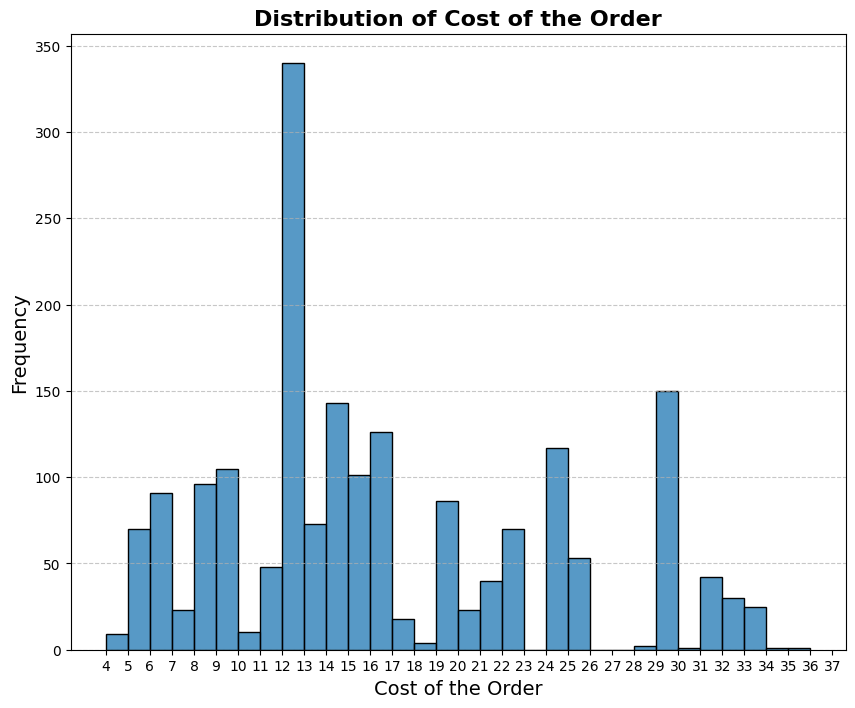

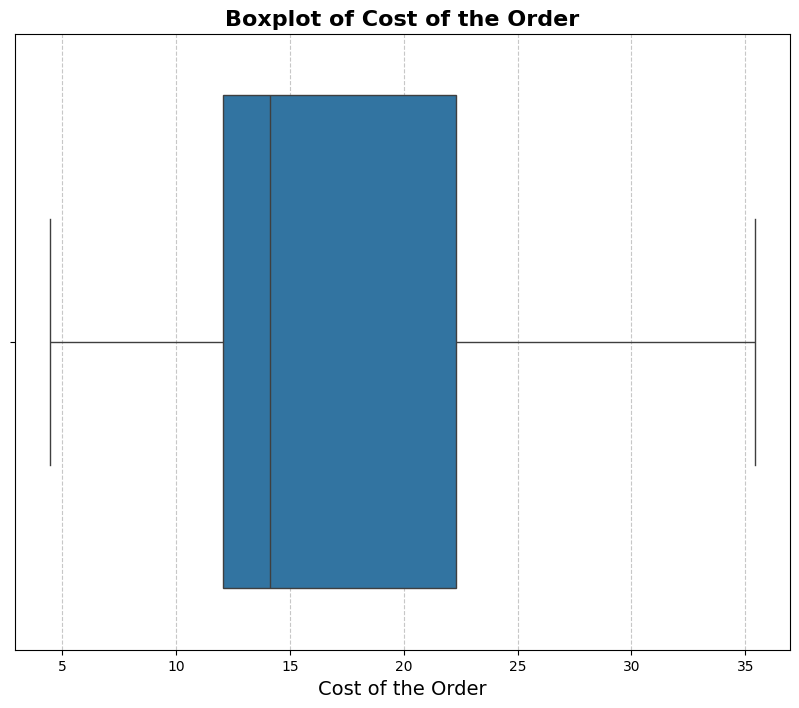

In [867]:
# Write the code here

# Histogram has been used for the univariate analysis of the column cost_of_the_order, bins have been arranged accoding to the minimum value of that particular column and maximum value of that particular column
plt.figure(figsize=(10, 8))
sns.histplot(data=df,x='cost_of_the_order', kde=False, bins=range(int(df['cost_of_the_order'].min()), int(df['cost_of_the_order'].max()) + 2))

plt.xticks(range(int(df['cost_of_the_order'].min()), int(df['cost_of_the_order'].max()) + 3))
plt.title('Distribution of Cost of the Order', fontsize=16, fontweight='bold')
plt.xlabel('Cost of the Order', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print() # This print statement has been added to seperate the plots

# Boxplot has been used here for the univariate analysis of the column cost_of_the_order
plt.figure(figsize=(10, 8))
sns.boxplot(data=df,x='cost_of_the_order')
plt.title('Boxplot of Cost of the Order', fontsize=16, fontweight='bold')
plt.xlabel('Cost of the Order', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [868]:
# All three quartiles have been mentioned here with the mean value
print("First Quartile for cost_of_the_order:",df['cost_of_the_order'].quantile(0.25),"USD")
print("Second Quartile for cost_of_the_order:",df['cost_of_the_order'].quantile(0.5),"USD")
print("Third Quartile for cost_of_the_order:",df['cost_of_the_order'].quantile(0.75),"USD")
print("Mean of the column cost_of_the_order :",df['cost_of_the_order'].mean(),"USD")

First Quartile for cost_of_the_order: 12.08 USD
Second Quartile for cost_of_the_order: 14.14 USD
Third Quartile for cost_of_the_order: 22.2975 USD
Mean of the column cost_of_the_order : 16.498851422550054 USD


## Observations :
1) The histogram here shows a right skewed distribution wherein there are more orders with less costs and fewer order with more costs.


2) The majority of the orders are concentrated around the lower costs and according to the box plot the median of the costs is around 14 USD

3) The spread of the data in the boxplot is between 5 and 35 with the IQR ranging between 12.08 and 22.2975.

4) Q1 represents the first quartile (25th percentile) which is 12.08 i.e 25% of the data is below or equal to 12.08 USD.

5) Q2 represents the second quartile (50th percentile) which is 14.14 USD i.e 50% of the cost of the orders is below or equal to 14.14 USD.

6) Q3 represents the third qurtile (75th percentile) which is 22.2975 USD i.e 75% of the cost of the orders is below or equal to 22.2975. USD.

7) The lowest cost is around 5 USD with the order count around 100.

8) The highest cost is around 35 USD with the order count around 10.

9) The mean of the data is around 16.49 USD while the median is 14.14 which is typical of a right skewed distribution.



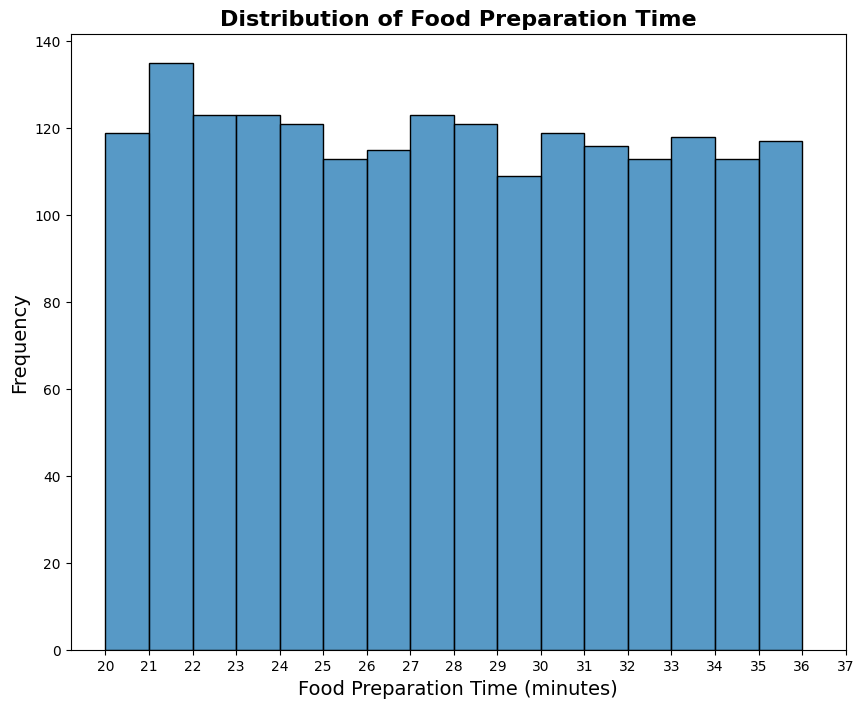

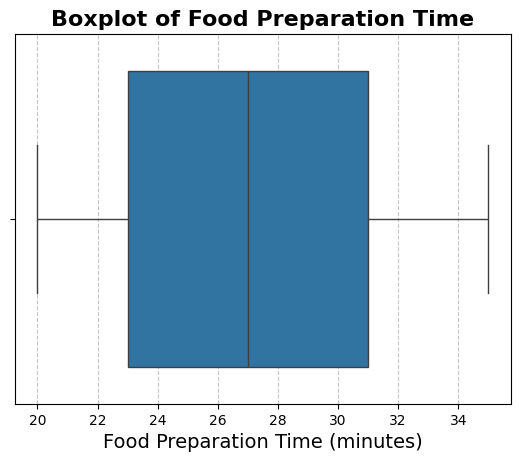

In [869]:
# Write the code here

# Histogram has been used for the univariate analysis of the column food_preparation_time, bins have been arranged accoding to the minimum value of that particular column and maximum value of that particular column
plt.figure(figsize=(10, 8))
sns.histplot(data=df,x='food_preparation_time', kde=False, bins=range(df['food_preparation_time'].min(), df['food_preparation_time'].max() + 2))
plt.xticks(range(df['food_preparation_time'].min(), df['food_preparation_time'].max() + 3))
plt.title('Distribution of Food Preparation Time', fontsize=16, fontweight='bold')
plt.xlabel('Food Preparation Time (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
plt.show()

print() # This print statement has been added to seperate the plots

# Boxplot has been used here for the univariate analysis of the column food_preparation_time
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time', fontsize=16, fontweight='bold')
plt.xlabel('Food Preparation Time (minutes)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [870]:
# All three quartiles have been mentioned here with the mean value
print("First Quartile for food_preparation_time:",df['food_preparation_time'].quantile(0.25),"minutes")
print("Second Quartile for food_preparation_time:",df['food_preparation_time'].quantile(0.5),"minutes")
print("Third Quartile for food_preparation_time:",df['food_preparation_time'].quantile(0.75),"minutes")
print("Mean of the column food_preparation_time :",df['food_preparation_time'].mean(),"minutes")

First Quartile for food_preparation_time: 23.0 minutes
Second Quartile for food_preparation_time: 27.0 minutes
Third Quartile for food_preparation_time: 31.0 minutes
Mean of the column food_preparation_time : 27.371970495258168 minutes


## Observations :
1) This is a uniform distribution wherein the food preparation time falling between 20 and 36 mins.

2) Highest orders are for dishes lying in the preparation time of range 21 and 22 minutes , count is around 135

3) The lowest number of orders are for the dishes lying in the preparation time of 29 to 30 mins, count is around 110

4) The median of the preparation time is around 27 minutes.

5) Q1 represents the first quartile (25th percentile) which is 23.0 minutes i.e 25% of the data is below or equal to 23.0 minutes.

6) Q2 represents the second quartile (50th percentile) which is 27.0 minutes i.e 50% of the preparation time of the orders is below or equal to 27.0 minutes .

7) Q3 represents the third qurtile (75th percentile) which is 31.0 minutes i.e 75% of the preparation time of the orders is below or equal to 31.0 minutes.

8) The spread of the data is between 20 and 36 minutes and the IQR range is 8 minutes.

9) The mean of the data is 27.37 minutes while the median is 27 minutes indicating the slight right skewdness.


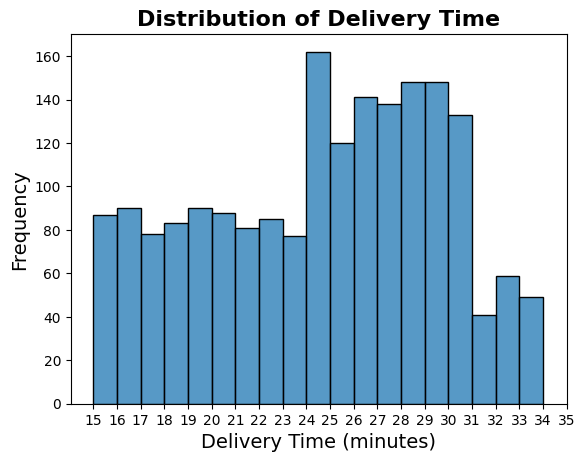

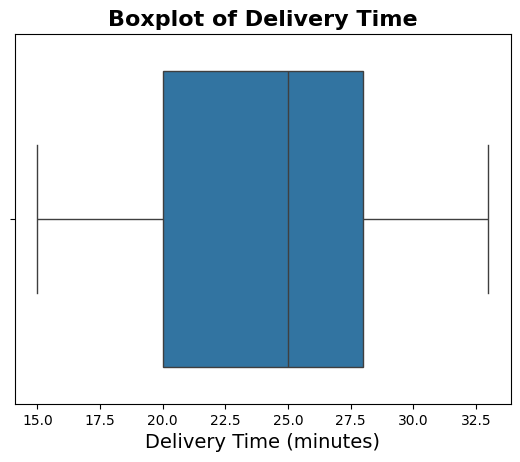

In [871]:
# Write the code here

# Histogram has been used for the univariate analysis of the column delivery_time, bins have been arranged according to the minimum value of that particular column and maximum value of that particular column
sns.histplot(data=df,x='delivery_time',kde=False,bins=range(df['delivery_time'].min(),df['delivery_time'].max()+2))
plt.xticks(range(df['delivery_time'].min(), df['delivery_time'].max() + 3))
plt.title('Distribution of Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

print() # This print statement has been added to seperate the plots

# Boxplot has been used here for the univariate analysis of the column delivery_time
sns.boxplot(data=df,x='delivery_time')
plt.title('Boxplot of Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (minutes)', fontsize=14)
plt.show()


In [872]:
# All three quartiles have been mentioned here with the mean value
print("First Quartile for delivery_time:",df['delivery_time'].quantile(0.25),"minutes")
print("Second Quartile for delivery_time:",df['delivery_time'].quantile(0.5),"minutes")
print("Third Quartile for delivery_time:",df['delivery_time'].quantile(0.75),"minutes")
print("Mean of the column delivery_time :",df['delivery_time'].mean(),"minutes")

First Quartile for delivery_time: 20.0 minutes
Second Quartile for delivery_time: 25.0 minutes
Third Quartile for delivery_time: 28.0 minutes
Mean of the column delivery_time : 24.161749209694417 minutes


### Observations :

1) The histogram here shows a left skewed distribution wherein there are more orders with high delivery times and fewer order with less delivery times.


2) The majority of the orders are concentrated around the high delivery times and according to the box plot the median of the delivery times is 25 minutes.

3) The spread of the data in the boxplot is between 15 minutes and 33 minutes with the IQR ranging between 20 minutes and 28 minutes.

4) Q1 represents the first quartile (25th percentile) which is 20 minutes i.e 25% of the data is below or equal to 20 minutes.

5) Q2 represents the second quartile (50th percentile) which is 25 minutes i.e 50% of the data is below or equal to 25 minutes.

6) Q3 represents the third qurtile (75th percentile) which is 28 minutes  i.e 75% of the data is below or equal to 28 minutes.

7) The lowest delivery time is 15 minutes with the order count around 90.

8) The highest delivery time is around 33 minutes with the order count around 49

9) The mean of the data is around 24.1617 minutes while the median is 25 minutes which is typical of a left skewed distribution.



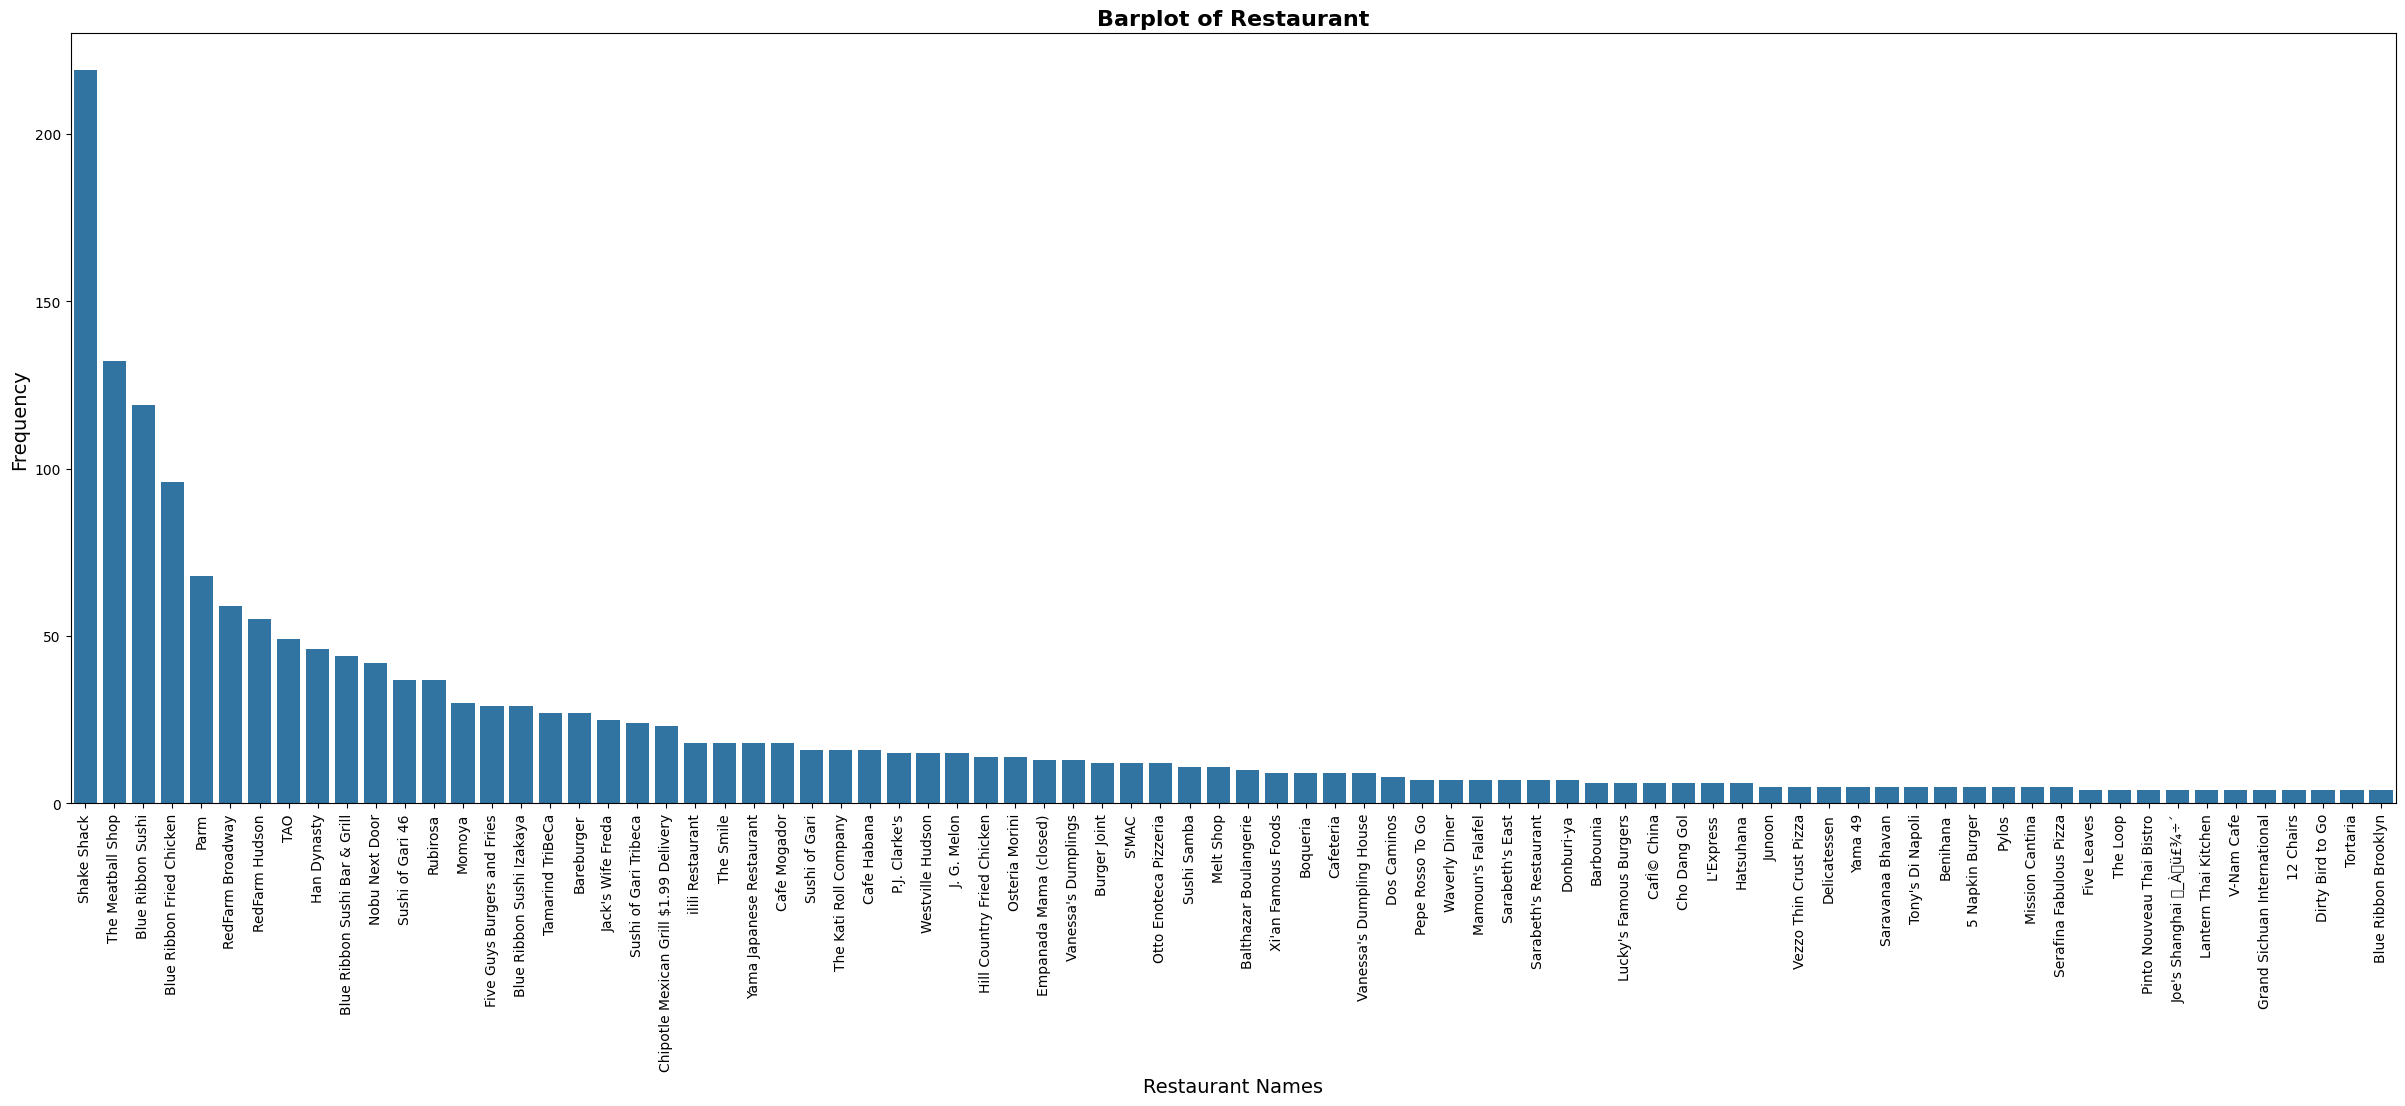

In [873]:
plt.rcParams['font.family'] = 'DejaVu Sans'  # default Matplotlib font



# Counting the restaurants for plotting the graph
restaurant_counts = (
    df['restaurant_name']
    .value_counts()
    .head(80)
    .reset_index(name='count')
);

# Adding the figure size and adding the barplot for the name of the restaurant and the respective count
plt.figure(figsize=(30, 10))
sns.barplot(data=restaurant_counts, x='restaurant_name', y='count')
plt.title('Barplot of Restaurant', fontsize=16, fontweight='bold')
plt.xlabel('Restaurant Names', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90);
plt.show();


### Observations :
1) The restaurant "Shake Shack" has the highest count of orders around 250 , the second highest count of orders is for restaurant "The Meatball shop" with a count of ~130.

2) The barplot shows a decline in the order count across the spectrum of restaurants and eventually the count reaches zero, indicating non-encouraging business outcomes from such restaurants.

3) Some restaurants have a very good count and business can explore novel mutually acceptable grounds to foster and propagate healthy fruitful partnerships.

4) Those restaurants with low level of order counts need to explore strategies to boost there business outcomes.

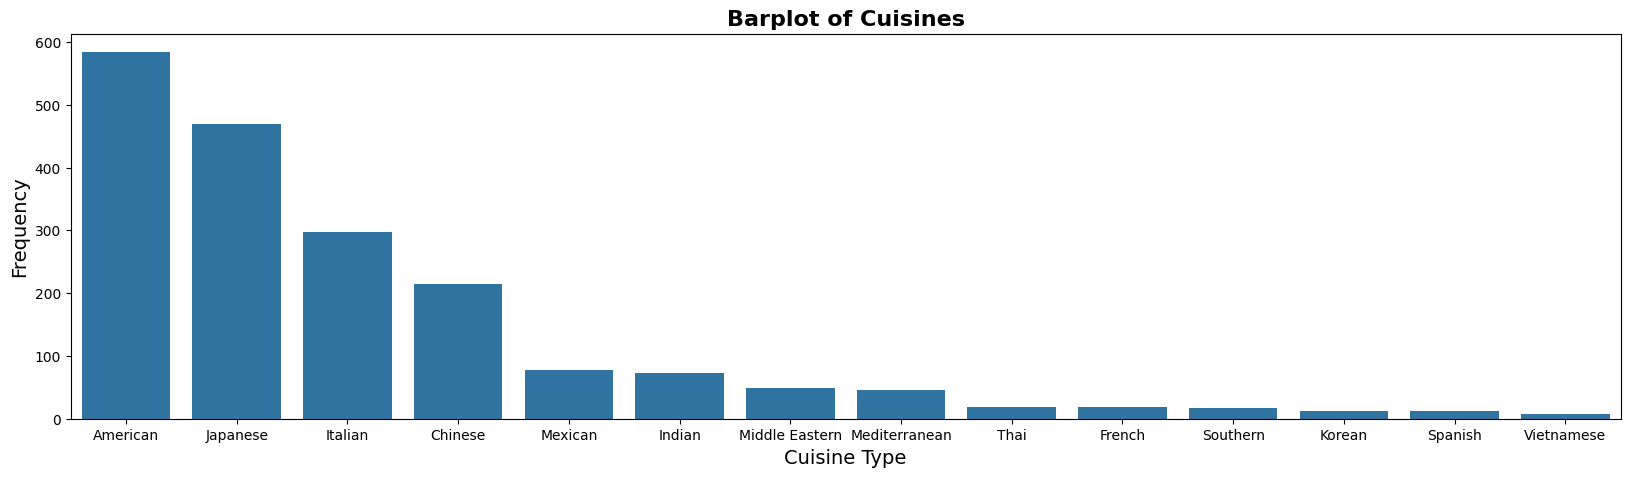

In [874]:
# Counting the cuisine types for plotting using the value counts function including all the cuisine types and naming the column with the frequency as count

cuisine_counts = (
    df['cuisine_type']
    .value_counts()
    .reset_index(name='count')
);

# Setting the size of plot
plt.figure(figsize=(20, 5))

# Setting the plot and the required variable and data for the same
sns.barplot(data=cuisine_counts,x='cuisine_type',y='count')
plt.title('Barplot of Cuisines', fontsize=16, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Observations :
1) Cuisine type as American with a count of around 580+ has the highest order count across all cuisines.

2) Japanese cuisines with a order count of ~480 has the second highest order count across all cuisines , and this ius followed by Italian cuisines with an order count of ~300.

3) The graph shows a gradual decline in the cuisine types with the cuisines of Spanish and Vietnamese having an order count of less than 20. This indicates the cuisine popularity across the whole spectrum of cuisines as the least popular.

4. Between the highest and lowest order counts, there are cuisines with moderate popularity, including Chinese (215 orders), Mexican (77 orders), Indian (73 orders), Middle Eastern (49 orders), Mediterranean (46 orders), Thai (19 orders), French (18 orders), and Southern (17 orders).

5. This analysis is based on the top 15 most frequent cuisine types in the dataset.

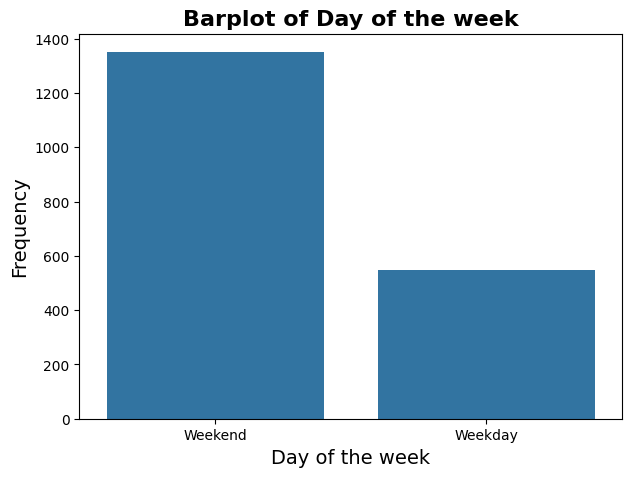

In [875]:
# Counting the day of the week for plotting using the value counts function including all the day of the week and naming the column with the frequency as count
day_counts = (
    df['day_of_the_week']
    .value_counts()
    .reset_index(name='count')
);

# Setting the size of plot
plt.figure(figsize=(7, 5))

# Setting the plot, the required variable and count for plotting
sns.barplot(data=day_counts,x='day_of_the_week',y='count')
plt.title('Barplot of Day of the week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Observations :
1) The total number of weekend count of the orders are above 1300 and the total weekday count of the order are less than 550.

2) This means that customers order more on weekends rather than on weekdays.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [876]:
# Write the code here
# Value count will provide the unique values with there corresponding frequencies and head function will further provide the top 5 results across the dataframe
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
1) The top restaurants which receive the highest orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi , Blue Ribbon Fried Chicken and Parm with the order count as 219 , 132,119,96,68 respectively.

2) These top 5 restaurants account for a considerable number of orders compared to the rest, indicating their strong popularity among customers.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [877]:
# Write the code here

# Calculating the dataframe of bool values where the day of the week is weekend and then applying it to the actual dataframe to get the rows across the original dataframe
orders_of_weekend = df[df['day_of_the_week']=='Weekend']

# Extracting the top cuisine type from the dataframe having only orders of weekend which fulfills the condition
most_popular_cuisine_weekend = orders_of_weekend['cuisine_type'].value_counts().head(1)
most_popular_cuisine_weekend


cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
1) American cuisine type is the most popular cuisine type on weekends having order count as 415.

2) American cuisines are a significant portion of the weekend orders i.e 415 orders out of total of 1351 weekend orders , which makes it a key driver of weekend business.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [878]:
# These are specific orders in dataframe format where the cost is above 20 USD
orders_above_20_usd = df[df['cost_of_the_order']>20.0]

# Retrieving the number of rows across the specific dataframe satisfying the criteria of orders above 20 USD
rows_across_orders_above_20_usd = orders_above_20_usd.shape[0]

# Calculating the percentage of orders which have cost above 20 USD
percentage_of_orders_above_20_usd = rows_across_orders_above_20_usd / df.shape[0] * 100

# Printing the final percentage
print(f"Percentage of orders above 20 USD:{percentage_of_orders_above_20_usd: .2f}%")




Percentage of orders above 20 USD: 29.24%


#### Observations:
1) There are ~ 30% (29.24%) orders where the cost of the orders is above 20 USD.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [879]:
# Applying the mean function across the delivery time column to get the mean order delivery time
mean_order_delivery_time = float(df['delivery_time'].mean())
print(f"Mean Order delivery time:{mean_order_delivery_time: .2f} minutes")

Mean Order delivery time: 24.16 minutes


#### Observations:
1) The mean order delivery time across all the orders is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [880]:
# The value counts function for the customer_id column gives the values of the highest counts of the customer's.
most_frequent_customers = df['customer_id'].value_counts()
most_frequent_customers[0:3] # This will give the top 3 most frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
1) The customer's with customer_id 52832,47440 and 83287 having order count as 13,10,9 respectively are the top 3 most frequent customer's.These customer's can be awarded 20% discount vouchers.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Bi-Variate Analysis

# Numerical VS Numerical variables

# Q) Does the cost of the order affect the delivery time?

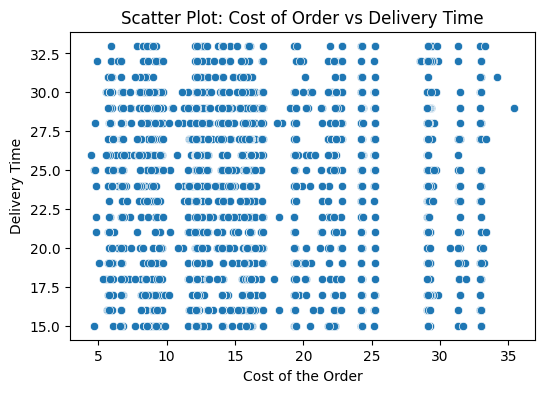

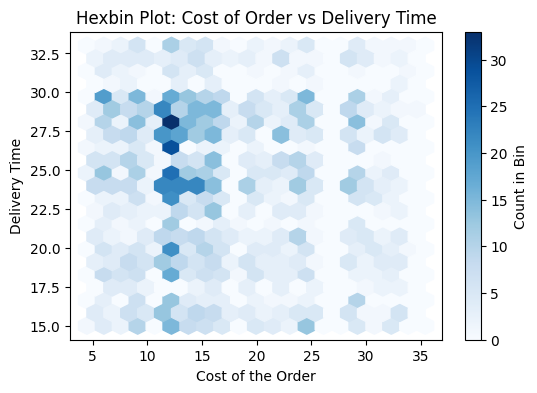

In [881]:

plt.figure(figsize=(6,4)) #Setting the plot size

#Plotting the scatterplot
sns.scatterplot(data=df,x='cost_of_the_order',y='delivery_time')
plt.title('Scatter Plot: Cost of Order vs Delivery Time')
plt.xlabel('Cost of the Order') #x-label
plt.ylabel('Delivery Time') #y-label
plt.show();

print() # This print statement has been added for seperating the plots

plt.figure(figsize=(6,4))

#Plotting the regplot
plt.hexbin(df['cost_of_the_order'], df['delivery_time'], gridsize=20, cmap='Blues')


plt.colorbar(label='Count in Bin') #Count of the bins
plt.xlabel('Cost of the Order') #x-label
plt.ylabel('Delivery Time') #y-label
plt.title('Hexbin Plot: Cost of Order vs Delivery Time')
plt.show()

### Observations:
1) According to the scatter plot, there is no strong linear correlation between the cost of the order and delivery time. But there is higher concentration of data points within the lower cost ranges while the delivery time seems to be spread across a range regardless of the order cost.

2) According to the hexbin plot, most of the order costs are in between 10 and 15 USD and have a delivery time between 27.5 minutes and 30 minutes. This tells us that a significant portion of the orders falls under this price range and this delivery time range.The frequency of the orders with costs reaching upto 35 USD and delivery times reaching above 32.5 minutes is very less.

# Does higher-rated food take longer to prepare and deliver ?

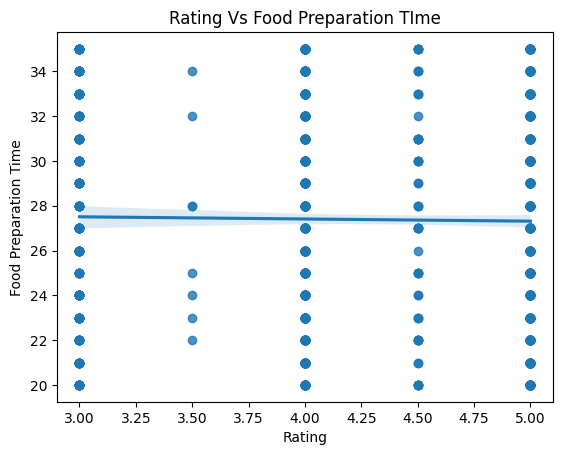

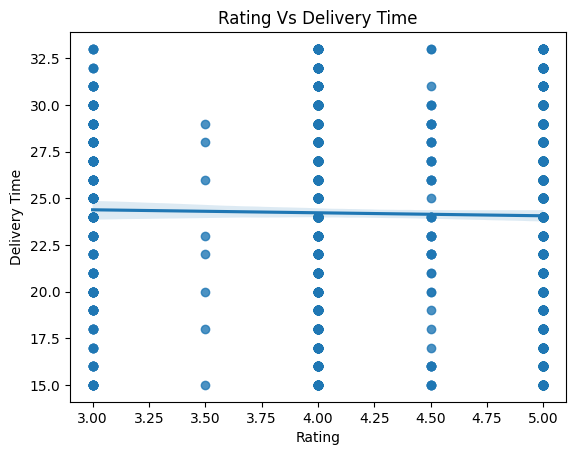

In [882]:
#Plotting the regplot
sns.regplot(data=df,x='rating',y='food_preparation_time')
plt.title("Rating Vs Food Preparation TIme")
plt.xlabel('Rating') #x-label
plt.ylabel('Food Preparation Time') #y-label
plt.show();


print() # This print statement has been added to seperate the plots

#Plotting the regplot
sns.regplot(data=df,x='rating',y='delivery_time')
plt.title("Rating Vs Delivery Time")
plt.xlabel('Rating') #x-label
plt.ylabel('Delivery Time') #y-label
plt.show();

### Observations:

## Ratings Vs Food Preparation Time

1) There is no strong relationship between ratings and food preparation time.

2) The regplot trend shows a slight negative correlation where the increase in food preparation time leads to slight drop in ratings but doesn't cause a major setback to the ratings.

## Ratings Vs Delivery Time

1) There is no strong relationship between ratings and delivery time.

2) The regplot trend shows a slight negative correlation where the increase in delivery time‹ leads to slight drop in ratings but doesn't cause a major setback to the ratings.


# Q) Is there a relationship between food preparation time and delivery time?

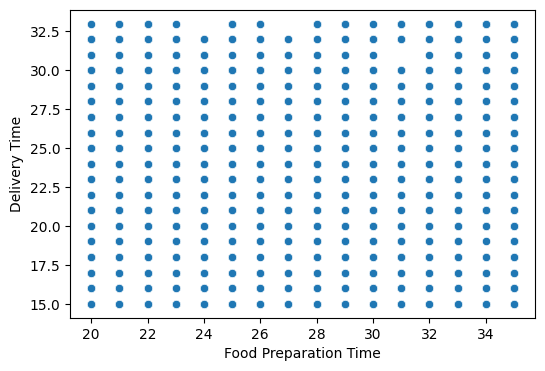

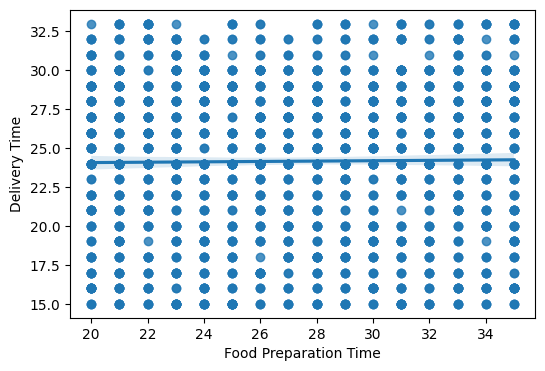

In [883]:
#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='food_preparation_time',y='delivery_time')
plt.xlabel('Food Preparation Time') #x-label
plt.ylabel('Delivery Time') #y-label
plt.show();

print() # This print statement has been added to seperate the plots

#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='food_preparation_time',y='delivery_time')
plt.xlabel('Food Preparation Time') #x-label
plt.ylabel('Delivery Time') #y-label
plt.show()



### Observation :
1) There is no strong linear relationshio between food_prepration_time and delivery_time. There is a no upward or downward trend with a non-zero correlation.

2) There is a slight upward trend that can be seen in the reg plot which can confirm the weak positive relation between food preparation time and delivery time.

# Does the cost of the order increase with food preparation time?

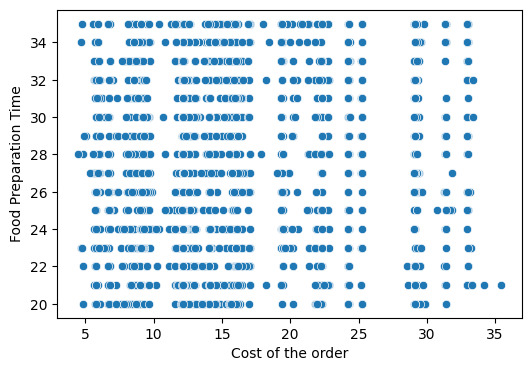

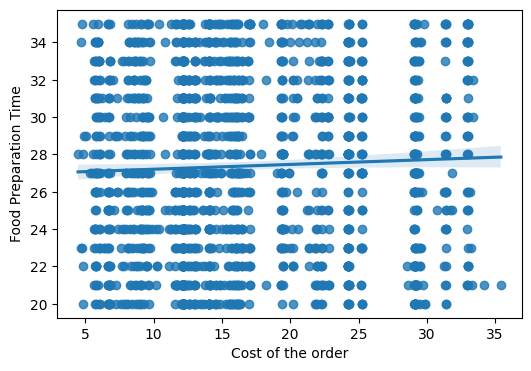

In [884]:
#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='cost_of_the_order',y='food_preparation_time')
plt.xlabel('Cost of the order') #x-label
plt.ylabel('Food Preparation Time') #y-label
plt.show();

print() # This print statement has been added to seperate the plots


#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='cost_of_the_order',y='food_preparation_time')
plt.xlabel('Cost of the order') #x-label
plt.ylabel('Food Preparation Time') #y-label
plt.show()

### Observations :
1) There is no strong linear relationship between food prepraration time and cost of the order but the data point density is very high for low cost orders across all range of food preparation times as whereas this level of data point density is less high cost orders.

2) There is a slight positive correlation between food preparation time and cost of the order.As the cost of the order increases, the food preparation time increases. This relationship is very weak and may not significantly impact the orders.

# Is there a correlation between rating and cost of the order?

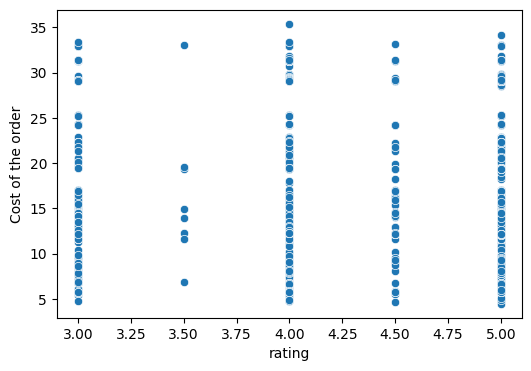

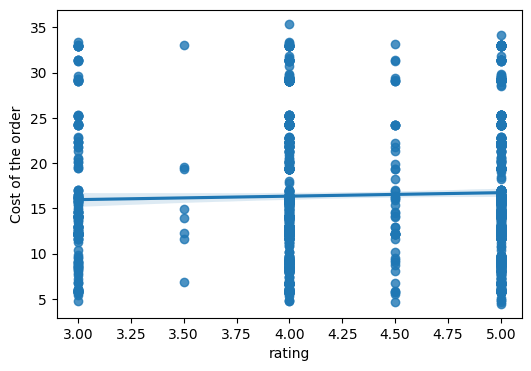

In [885]:
#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='rating',y='cost_of_the_order')
plt.xlabel('rating') #x-label
plt.ylabel('Cost of the order') #y-label
plt.show();

print() # This print statement has been added to seperate the plots

#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='rating',y='cost_of_the_order')
plt.xlabel('rating') #x-label
plt.ylabel('Cost of the order') #y-label
plt.show()

### Observations:
1) There is no strong linear relationship between cost of the order and rating.Data concentration is  high for discrete rating bands while there is no indication of a strong relationship with un-clear upward and downward pattern.

2) There is a slight postive trend according to the regression plot. As the rating increases , the cost of the order also increases. But the positive correlation trend is very weak and does not significantly impact the orders.

# Categorical Vs Numerical

# Which cuisine type tends to have higher cost of orders?

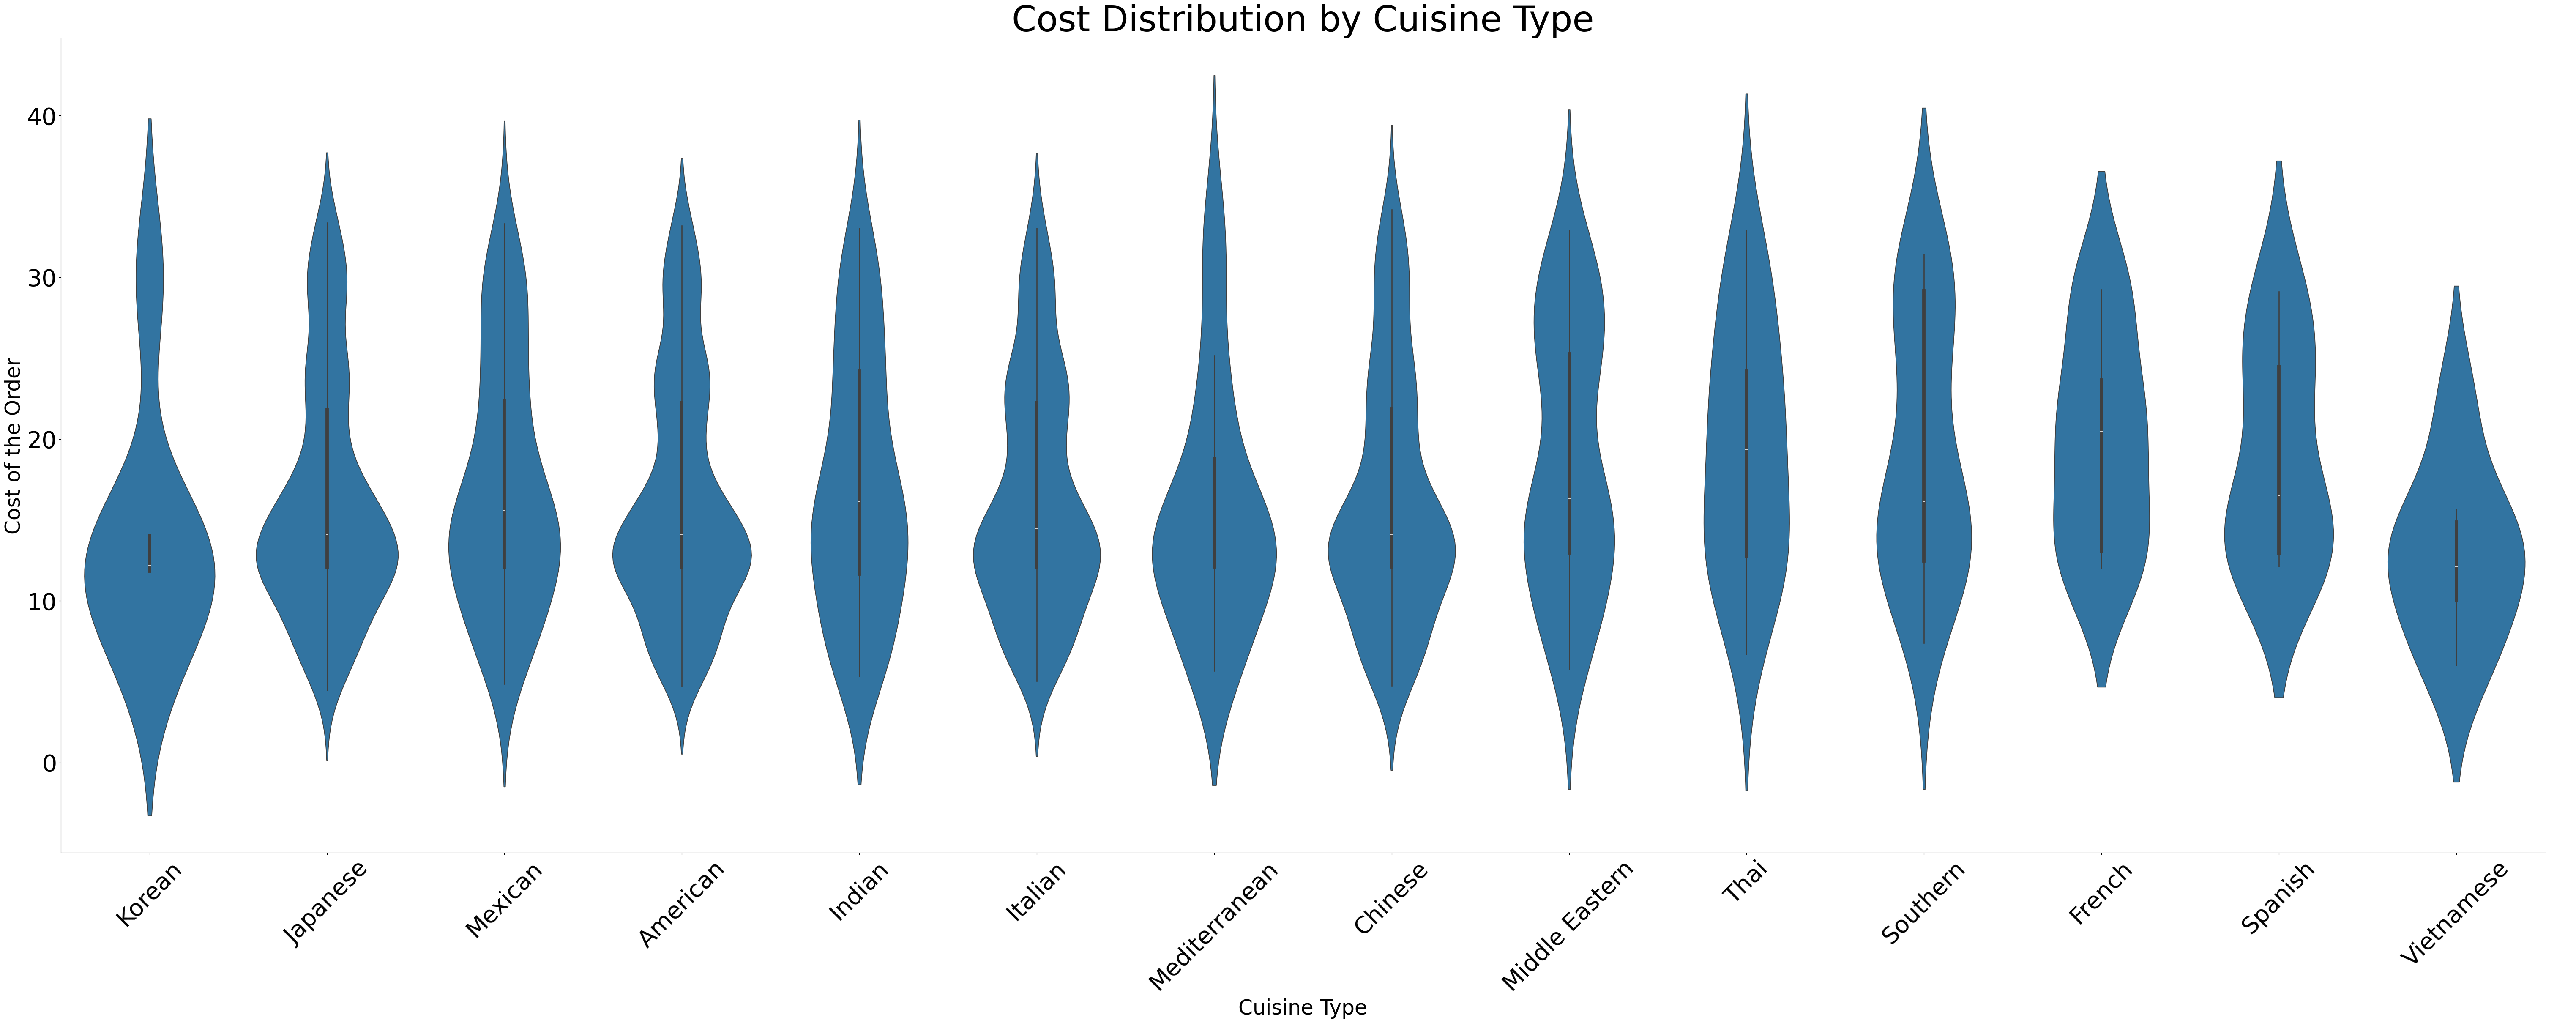

In [886]:
#Setting the plot size and plotting it
sns.catplot(data=df,x='cuisine_type',y='cost_of_the_order',kind='violin',aspect=3,height=20)

plt.xticks(fontsize=40, rotation=45)
plt.yticks(fontsize=40)
plt.xlabel("Cuisine Type", fontsize=35)
plt.ylabel("Cost of the Order", fontsize=35)
plt.title("Cost Distribution by Cuisine Type", fontsize=60)
plt.show()


### Observations:
1) This violin plot shows the overall disribution of order costs for each cuisine type. The width of the plot indicates the density of orders at a particular cost.

2) The thin black line indicates the lower and upper adjacent values while the thick black line represents the IQR with the mddle white showing the median.

3) Some plots are more wide than the others.If there is a wider bottom then the plot is right skewed while a wider top indicates a left skewed distribution.

4) Almost all of the cuisine types,have a primary bulge around the range of 10 USD to 16 USD with the median around 14 USD.

5) Some cuisines have a less dense secondary bulge with respect to higher orders such as the Italian with a cost of 20 and 30 USD , Middle Eastern with a cost between 25 and 35 USD, Southern with a bulge between 25 and 35 USD ,Spanish with a bulge between 25 and 35 USD.

6)  Cuisines of Spanish , Thai and middle easters origin tend to have a high density across the low 20s.

7) The thin-ness towards the upper end indicates the high premium orders which are highly infrequent but existent across all cuisines.

8) Korean, Japanese , American , Italian , French , Spanish have a high premium cost reaching upto 40 while the cusines of Mexican , Indian,Mediterranean , Chinese , Middle Eastern , Thai and Southern have a high premium order range above 40 USD.

9) Within this thin premium range, Vietnamese cuisine have the least premium range , reaching upto only 35 USD


# Which day of the week has the longest average delivery time and Food preparation time ?


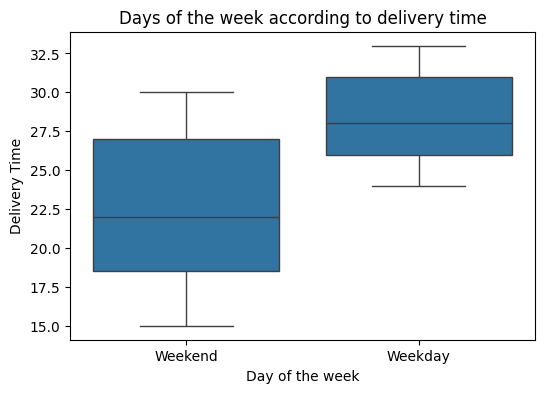

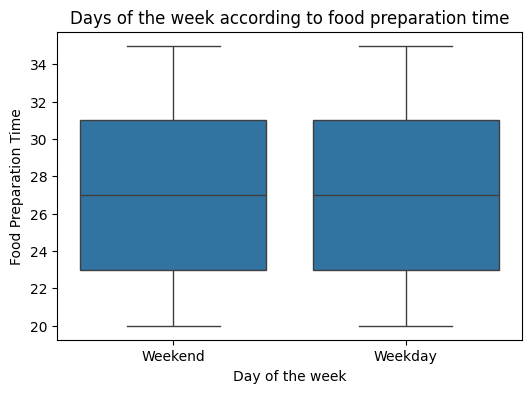

In [887]:
#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.xlabel('Day of the week') #x-label
plt.ylabel('Delivery Time') #y-label
plt.title('Days of the week according to delivery time')
plt.show();

print() # This print statement has been added to seperate the plots

#Setting the plot size and plotting it
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.xlabel('Day of the week') #x-label
plt.ylabel('Food Preparation Time') #y-label
plt.title('Days of the week according to food preparation time')
plt.show();

### Observations:

### delivery_time vs day_of_the_week​

1) According to the box plot between delivery_time and day_of_the_week, there is a clear pattern differentiating weekends and weekdays, visible in the shift of medians and quartiles.​

2) During weekends the minimum delivery time (lower whisker) is about 15 minutes, whereas during weekdays the minimum is around 24 minutes.​

3) The maximum delivery time during weekends is about 30 minutes, and during weekdays it exceeds 32.5 minutes (upper whisker).​

4) During weekends, 25% of the orders are delivered in ≤19 minutes (Q1), while during weekdays, 25% of the orders are delivered in ≤26 minutes.​

5) The median delivery time on weekends is below 22.5 minutes, whereas on weekdays it is above 27.5 minutes.​

6) For 75% of the orders during weekends, the delivery time is ≤27 minutes (Q3), and for weekdays it is ≤31 minutes.​

7) The maximum delivery time during weekends is around 30 minutes, whereas the maximum delivery time during weekdays is above 32.5 minutes.​

### food_preparation_time vs day_of_the_week​

8) The box plots for food_preparation_time appear nearly identical for weekends and weekdays, indicating similar distribution, median, and spread across both groups.​

9) The minimum food preparation time is around 20 minutes, while the maximum exceeds 34 minutes.​

10) About 25% of all orders take ≤23 minutes to prepare (Q1), and the median preparation time is roughly 27 minutes.​

11)  About 75% of all orders take ≤31 minutes to prepare (Q3).​

# Which cuisine type has the highest average rating ?

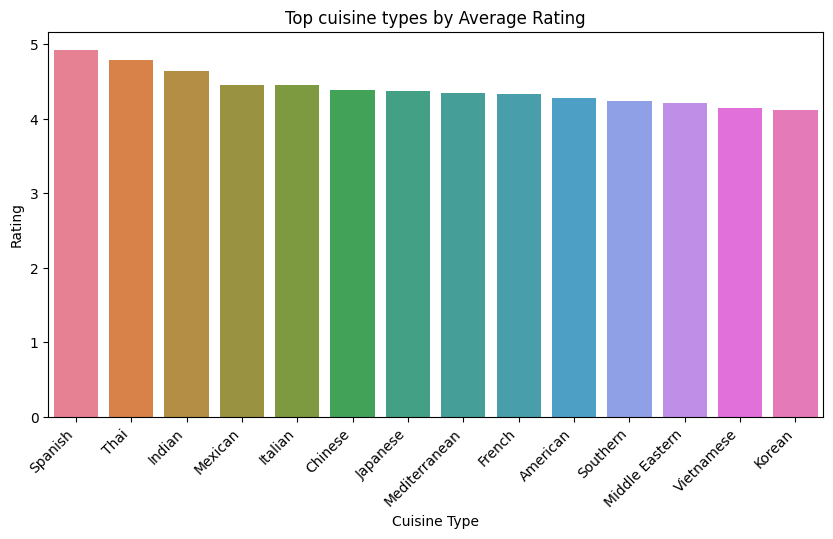

In [888]:


# Calculate average rating per cuisine
avg_rating = df.groupby('cuisine_type')['rating'].mean().reset_index()

# Sort by highest rating
top_cuisines = avg_rating.sort_values(by='rating', ascending=False)



# Plot cuisines by average rating
plt.figure(figsize=(10,5))

sns.barplot(data=top_cuisines, x='cuisine_type', y='rating',hue='cuisine_type',legend=False);
plt.xlabel('Cuisine Type') #x-label
plt.ylabel('Rating') #y-label
plt.title('Top cuisine types by Average Rating');
plt.xticks(rotation=45, ha='right');
plt.show();


### Observations:
1) All 14 cuisine types have been mentioned here according to highest average rating in a descending order

2) Highest average rating according to cuisine type is for Spanish, and then Thai and then Indian.

3) None of the ratings on an average basis are less than 4.

4) Lowest average rating is for Korean cuisine type.

### Is Day of the week related to higher ratings ?

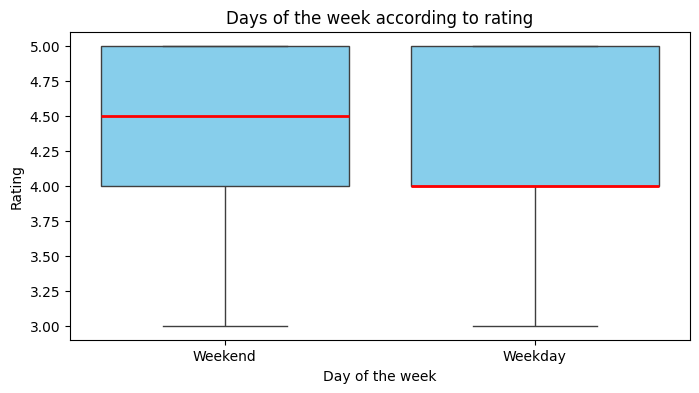

In [889]:
#Setting the plot size and plotting it
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='day_of_the_week',y='rating', medianprops={'color': 'red', 'linewidth': 2},boxprops={'facecolor': 'skyblue'})
plt.xlabel('Day of the week') #x-label
plt.ylabel('Rating') #y-label
plt.title('Days of the week according to rating')
plt.show();


### Observations:
1) The data for weekday is positively skewed where mean > median.

2) The data for weekend is negatively skewed where median > mean.

3) In case of both weekday and weekend , least rating value is 3.

### Weekend

4) 25% of the orders have a rating of less than or equal to 4

5) 50% of the orders have a rating of less than or equal to 4.5

6) 75% of the orders have a rating of less than or equal to 5

### Weekday

7) 25% and 50% of the orders coincide here which have a rating of less than or equal to 4

8) 75% of the orders have a rating of less than or equal to 5.


### Which day of the week sees higher cost_of_the_order values?

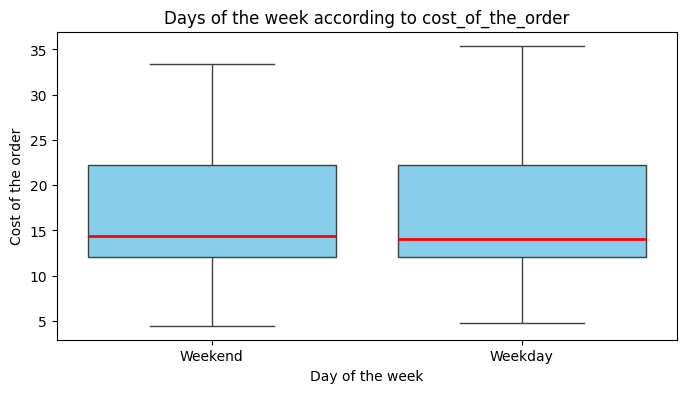

In [890]:
#Setting the plot size and plotting it
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order', medianprops={'color': 'red', 'linewidth': 2},boxprops={'facecolor': 'skyblue'})
plt.xlabel('Day of the week') #x-label
plt.ylabel('Cost of the order') #y-label
plt.title('Days of the week according to cost_of_the_order')
plt.show();


### Observations:
1) Both the box plot have the same trend.

2) The lowest cost across weekend and weekday is less than 5 USD.

3) The median values across weekday and weekend is around 15 USD

4) Less than or equal to 25% of the orders have a cost around 13 USD across both weekend and weekday.

5) Less than or equal to 75% of the orders have a cost around 23 USD across both weekend and weekday

6) Highest order cost across weekend is around 34 USD while across the weekday it is above 35 USD.

# Which cuisine types take longer to prepare and deliver?

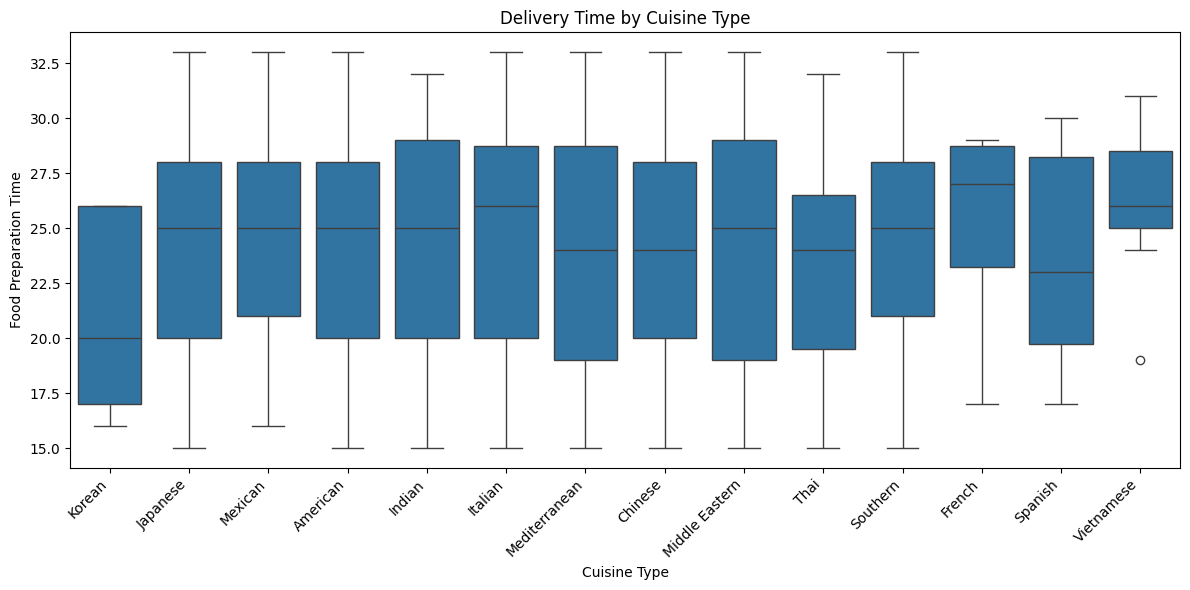

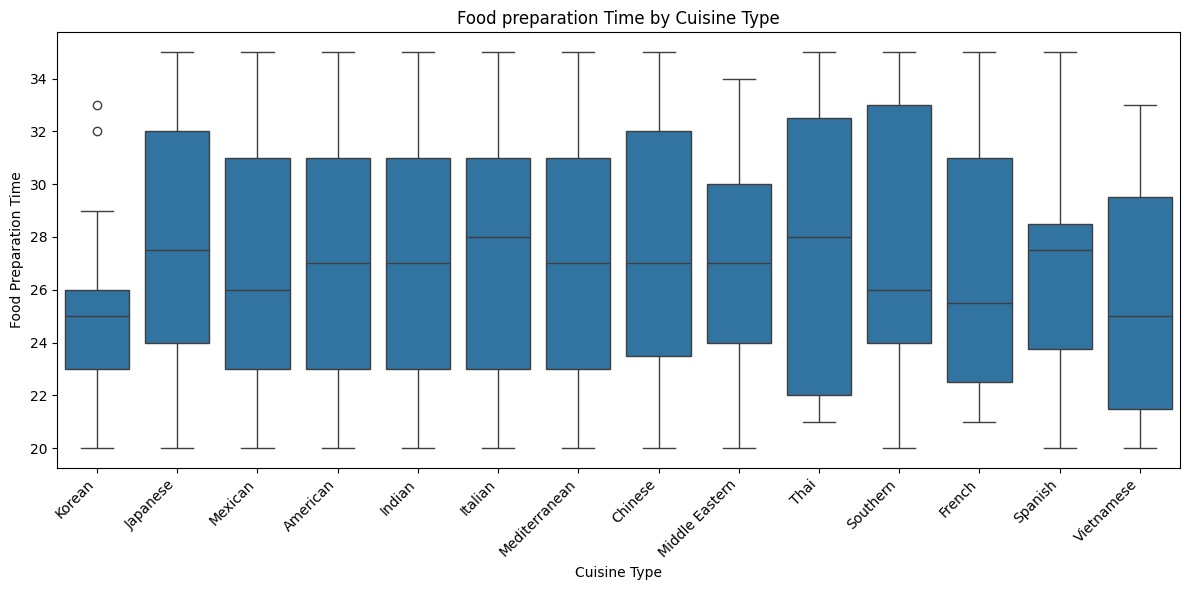

In [891]:
#Setting the plot size and plotting it
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xlabel('Cuisine Type') #x-label
plt.ylabel('Food Preparation Time') #y-label
plt.title("Delivery Time by Cuisine Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print() # This print statement has been added to seperate the plots

#Setting the plot size and plotting it
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xlabel('Cuisine Type') #x-label
plt.ylabel('Food Preparation Time') #y-label
plt.title("Food preparation Time by Cuisine Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations:

### Cuisine Type Vs Delivery Time

1) The lowest delivery times for 64% of the cuisines which are Japanese , Indian , American , Italian , Mediterranean , Chinese , Middle Eastern , Thai and Southern cuisines is 15 minutes.

2) The highest delivery times for  71% of the cuisines which are Japanese , Indian , American , Italian , Mediterranean , Chinese , Middle Eastern , Thai , Southern and Mexican is close to 32.5 minutes.

3) The median delivery time for 64% of the cuisines which are Japanese,Mexican, American, Indian , Italian , Middle eastern ,French,Southern and Vietnamese is between 25 minutes and 27.5 minutes.

4) Korean cuisine has the lowest median delivery time of 20 minutes.

5) Highest median delivery time is of the French cuisine around 27.5 minutes.

6) Vietnamese cuisine has an outlier where the delivery time is between 17.5 and 20 minutes.

7) Mditerranean, Spanish , Middle eastern have a long IQR where first quartile is at 20 minutes and third quartile is around 27.5 minutes.

### Cuisine Type Vs Food Preparation Time

1) The lowest food prep time for a majority of cuisines appears near the lower whisker around 20 minutes,

2) The highest food prep time for most cuisines reaches the upper whisker near 35 minutes.

3) The median prep time for many cuisines (e.g., American, Italian, Mediterranean, Chinese) is around 27.5 minutes

4) Southern and Thai cuisines display higher medians near 30 minutes with tall boxes, indicating both higher central prep times and larger interquartile ranges

5) Korean cuisine shows the lowest median prep time at about 22.5-25 minutes

6) Vietnamese cuisine has a slightly lower median (about mid-0s) with a noticeable lower whisker extension toward ~20 minutes

7) Japanese cuisine centers near the mid to upper-20s for the median



# Which day of the week sees higher ratings ?

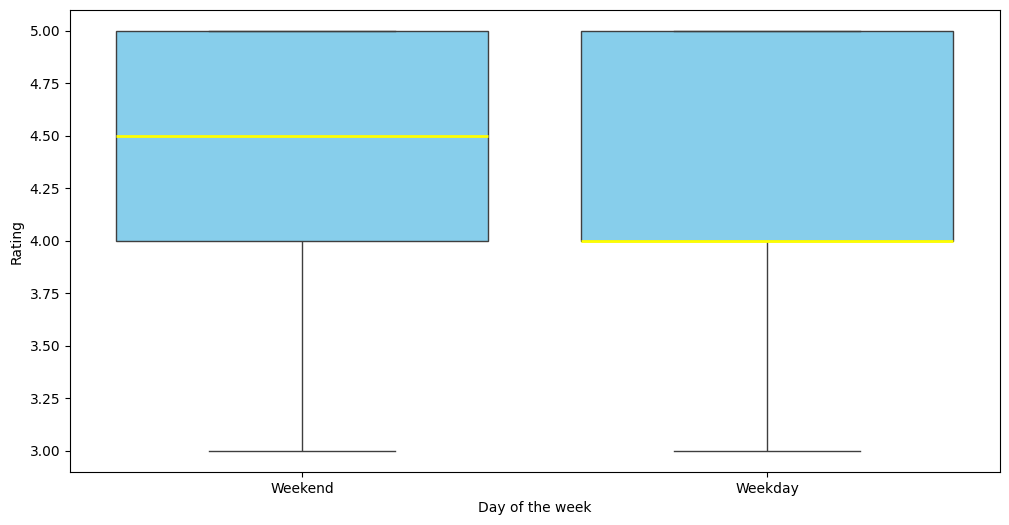

In [892]:
#Setting the plot size and plotting it
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x='day_of_the_week',y='rating',medianprops={'color':'yellow','linewidth':2},boxprops={'facecolor':'skyblue'})
plt.xlabel('Day of the week') #x-label
plt.ylabel('Rating') #y-label
plt.show()

### Observations:

1) Both weekend and weekday ratings show similar median values at approximately 4.5, indicating consistent customer satisfaction regardless of the day type.

2) The minimum rating for weekdays appears lower (around 3.0) than weekends (around 4.0), indicating that low ratings are more common during weekdays

3) Both categories show upper quartiles reaching close to 5.0, demonstrating that high ratings are consistently achieved throughout the week

4) No visible outliers are present in either category, suggesting a relatively stable rating distribution without extreme anomalies

5) The median rating value during weekend is 4.5 whereas the same value (or the values below or equal to 25% of the orders) is 4 suggesting more customer satisfaction during weekends.

# How are the orders distributed across low, medium, and high cost categories?

In [893]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

###Observations:

1) Since there are 178 restaurant entries,the describe function for cost_of_the_order describe the quartiles.

2) Here we have divided the restaurant into groups based on high costs, medium costs and low costs.

3) Restaurants will be divided into groups ranging from 0-12 (low) , above 12 and less than or equal to 22 (medium) and 22+ will be categorised as high costs.

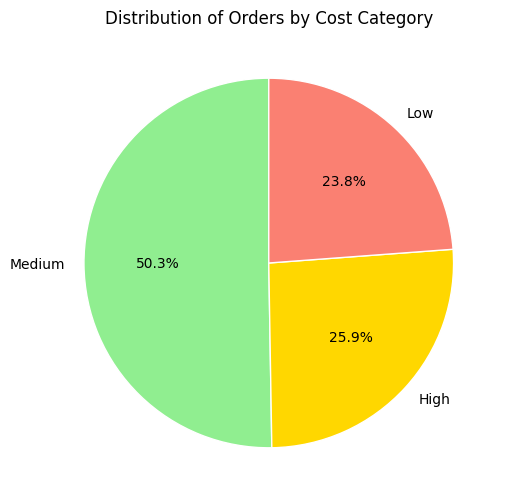

In [894]:
def cost_category(x):
    if x <= 12:
        return 'Low'
    elif x <= 22:
        return 'Medium'
    else:
        return 'High'

df['cost_category'] = df['cost_of_the_order'].apply(cost_category)

cost_counts = df['cost_category'].value_counts().reset_index()



plt.figure(figsize=(6,6))
plt.pie(
    cost_counts['count'],
    labels=cost_counts['cost_category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'gold', 'salmon'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribution of Orders by Cost Category')
plt.show()


### Observations:

1) Order Costs have been divided into 3 categories : Low, Medium and High.

2) 23.8% of the orders are under the category of low costs.

3) 25.9% of the orders are under the category of high costs.

4) 50.3% of the orders are under the category of medium costs.

5) Maximum orders fall under the category of medium costs only.

# How are orders categorized based on food preparation time and delivery time in the respective categories ?

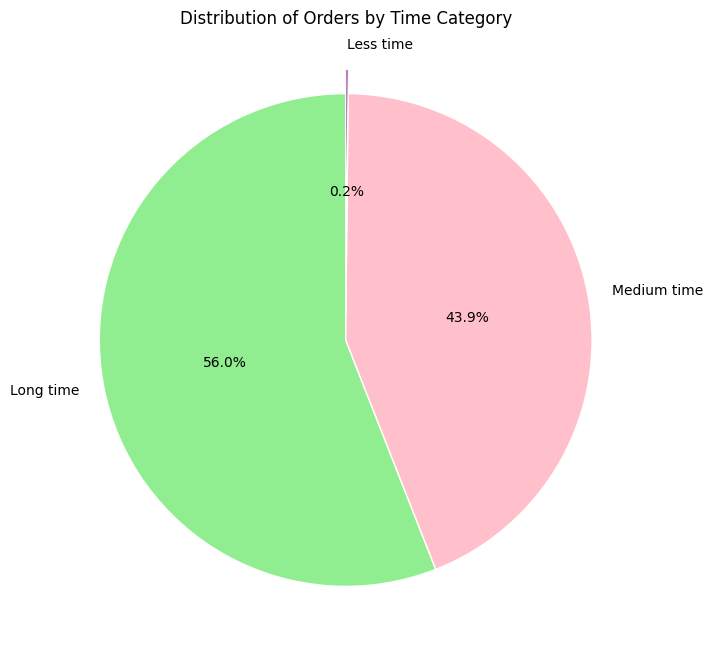

In [895]:

def time_category(x):
  if x <=35:
    return "Less time"
  elif x<=50:
    return "Medium time"
  else:
    return "Long time"


df['total_time'] = df['delivery_time'] + df['food_preparation_time']

df['time_category'] = df['total_time'].apply(time_category)

time_counts = df['time_category'].value_counts().reset_index()

explode = [0.1 if val < 1 else 0 for val in time_counts['count']/time_counts['count'].sum()*100]

plt.figure(figsize=(10,8))
plt.pie(
    time_counts['count'],
    labels=time_counts['time_category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen','pink','purple'],
    wedgeprops={'edgecolor':'white'},
    labeldistance=1.1,
    pctdistance=0.5,
    explode=explode
)
plt.title('Distribution of Orders by Time Category')
plt.show()


### Observations:

1) Only 0.2% of the orders take less time to reach in the hands of customers i.e take less than or equal to 35 minutes.

2) 43.9% of the orders take medium time to reach in the hands of the customers which is basically more than 35 minutes and less than or equal to 50 minutes.

3) 56% of the orders take long time to reach in the hands of customers which is basically the more than 50 minutes.

4) Maximum orders fall under the category of orders taking more than 50 minutes which is the category of long time.

# Categorical Vs Categorical

# Which cuisine types are ordered most frequently during a week ?

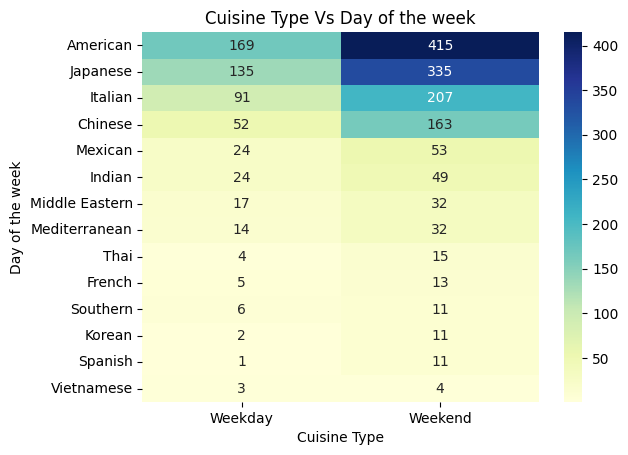

In [896]:
#Creating a summary table
cuisine_type_week_frequency = pd.crosstab(df['cuisine_type'],df['day_of_the_week'])


# Add total count column and sort by it
cuisine_type_week_frequency['Total'] = cuisine_type_week_frequency.sum(axis=1)
cuisine_type_week_frequency = cuisine_type_week_frequency.sort_values(by='Total', ascending=False)

# Drop total column before plotting
cuisine_type_week_frequency = cuisine_type_week_frequency.drop(columns='Total')


#Plotting a heatmap
sns.heatmap(data=cuisine_type_week_frequency,cmap='YlGnBu',cbar=True,annot=True,fmt='d')
plt.title("Cuisine Type Vs Day of the week")
plt.xlabel("Cuisine Type")
plt.ylabel("Day of the week")
plt.show()

### Observations:

#### Weekday

1) American cuisine is in highest demand with a count of 169. After that, comes the japanese cuisine with a count of 135 and Italian cuisine count of 91.

2) Least popular cuisine  with single digit order count are the Korean , Spanish, Vietnamese where the count of orders is 2,1,3 respectively.

3) Single digit order count for cuisines also exists in the middle order for Southern,French , Thai where the order count is 6,5,4 respectively.

### Weekend

4) During the weekend , the jump is absolute for all types of cuisines.

5) For America, the count increased exponentially from 169 to 415, which is more than twice the weekday orders. Approximately a similar increase can be seen in all other cuisines except Korean and Spanish where the increase during weekend was 11x the order count of weekday.

6) Vietnamese has a single digit order count even during the weekends and the increase during weekend is only by 1 unit.

### Overall

7) There is a general weekend effect where the order count grows by double during weekend from weekday.

8) Some cuisines grow on a very rapid scale on weekend beyond the rate of twice rate of growth but the number remains substantially less , eg during weekdays the cuisine of Spanish has a order count of 1 and during weekend it is 11 but still remains less popular as compared to american and high order count cuisines.



# What proportion of all restaurants does each cuisine type represent?

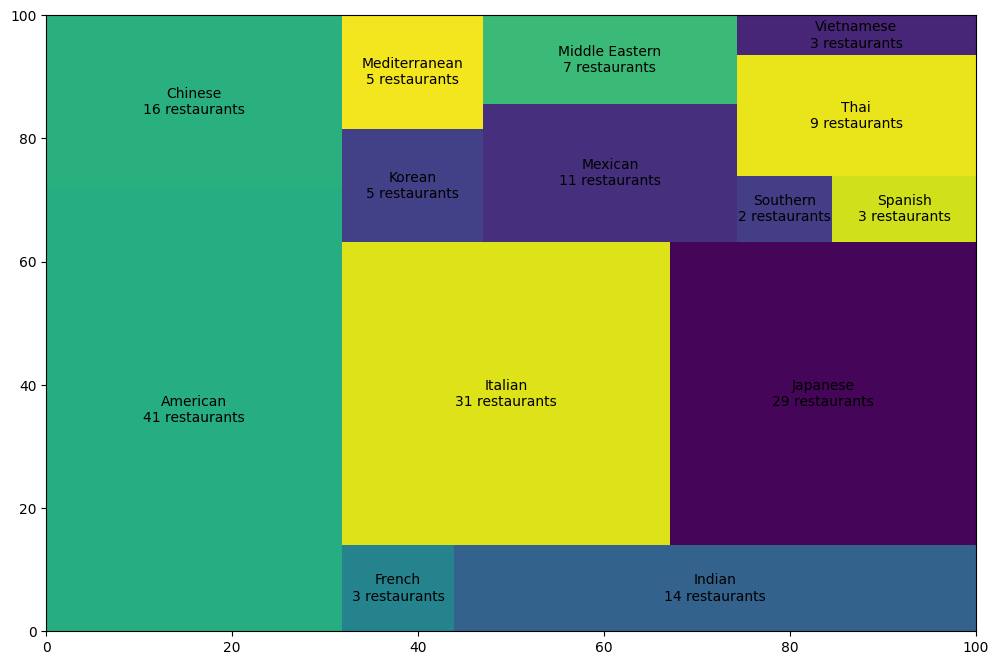

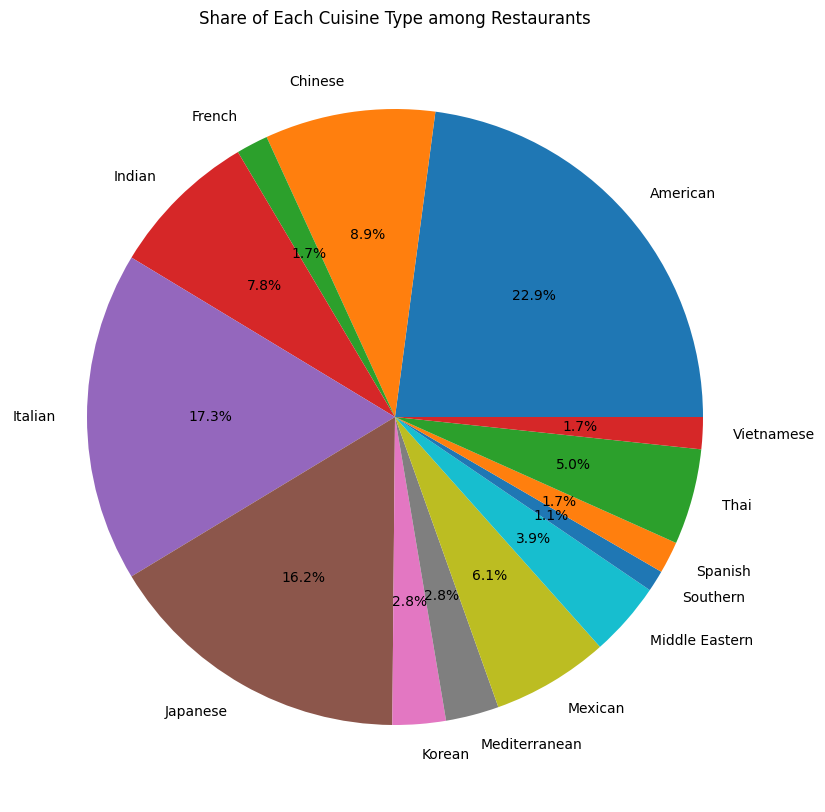

In [897]:
grouped = df.groupby('cuisine_type')['restaurant_name'].unique()

grouped = grouped.reset_index()
grouped['restaurant_count'] = grouped['restaurant_name'].apply(lambda x: len(x))
unique_restaurant_count = df['restaurant_name'].unique()

#Calculating the percentage
grouped['restaurant_percentage'] = grouped['restaurant_count']/len(unique_restaurant_count) *100

labels = [
    f"{cuisine}\n{count} restaurants"
    for cuisine, count in zip(grouped['cuisine_type'], grouped['restaurant_count'])
]

# Plot treemap
plt.figure(figsize=(12,8))
sq.plot(
    sizes=grouped['restaurant_count'],
    label=labels,
    alpha=1.0
)
plt.show()

# This print statement is to separate the plots
print()


#Setting the size and plotting the pie chart
plt.figure(figsize=(15,10))
plt.pie(grouped['restaurant_percentage'], labels=grouped['cuisine_type'], autopct='%1.1f%%')
plt.title('Share of Each Cuisine Type among Restaurants')
plt.show()



### Observations:
1) Both Square plot and pie chart verify that 22.9% of restaurants i.e 41 restaurants include the American cuisine in there menus.

2) After American share of cuisines, comes the Italian , Japanese and Chinese cuisines with the highest shares with the percentage being 17.3%,16.2% and 8.9% respectively.

3) Indian , Mexican , Middle Eastern and Thai cuisines have a presence in only 14,11,7,9 restaurants.

4) French , Mediterranean , Southern , Spanish , Korean , Vietnamese cuisines have a relatively low low presence across the restaurants.


# Which day of the week sees the most orders from particular restaurants?

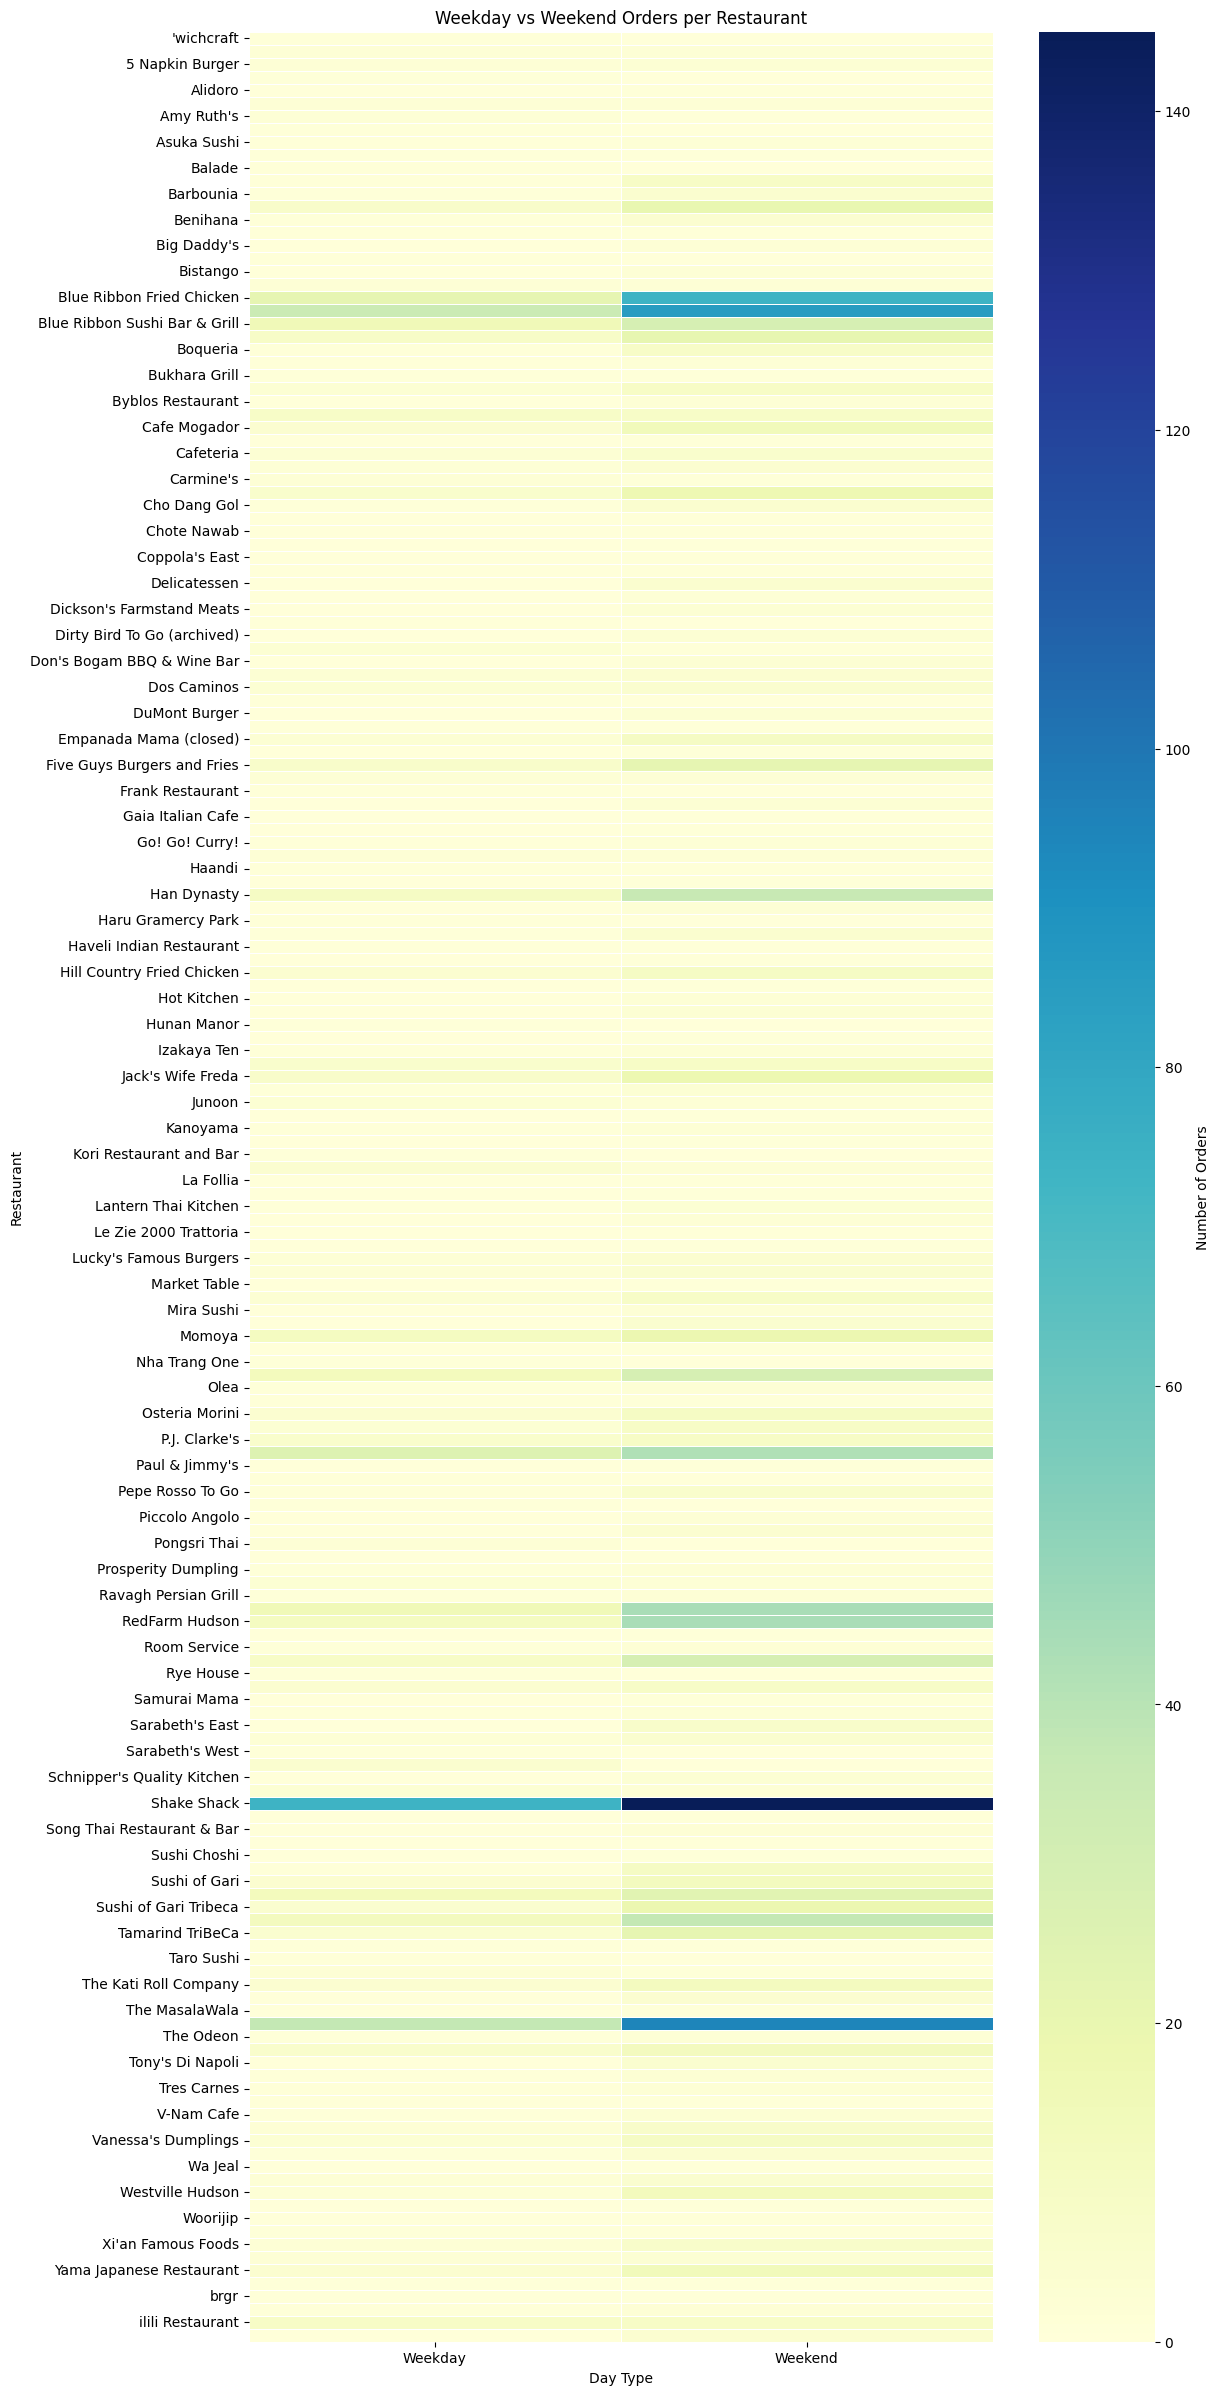

In [898]:
# Group by restaurant and day_of_the_week (Weekday/Weekend)
orders_summary = (
    df.groupby(['restaurant_name', 'day_of_the_week'])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

# Add total order count
orders_summary['Total'] = orders_summary['Weekday'] + orders_summary['Weekend']

plt.figure(figsize=(12, 30))   # make it taller for readability
sns.heatmap(
    orders_summary.set_index('restaurant_name')[['Weekday', 'Weekend']],
    cmap='YlGnBu',
    linewidths=0.5,
    antialiased=False,
    linecolor='white',
    cbar_kws={'label': 'Number of Orders'}
)
plt.title('Weekday vs Weekend Orders per Restaurant')
plt.xlabel('Day Type')
plt.ylabel('Restaurant')
plt.show()


### Observations:
1) Across the heatmap, it is a general visible trend, that the sales of cuisines is either equal or greater on weekends.

2) Some cases where the weekend cuisine sales are greater than wekday sales  are "Shake Shack" where the weekend sales is above 140 whereas the weekday sales is between 80 and 100 ,

3) 132 restaurants have a greater weekend sales as compared to the weekday sales. Majority restaurants  remain within a single digit increase limit.

4) 46 restaurants have a greater weekday sales , but these incremental trends have a increase of only 1 unit and the counterpart weekend , in maximum cases has a order count of zero for that particular restaurant.

# Multi-Variate Analysis

# Does the relationship between order cost and delivery time vary by cuisine type?

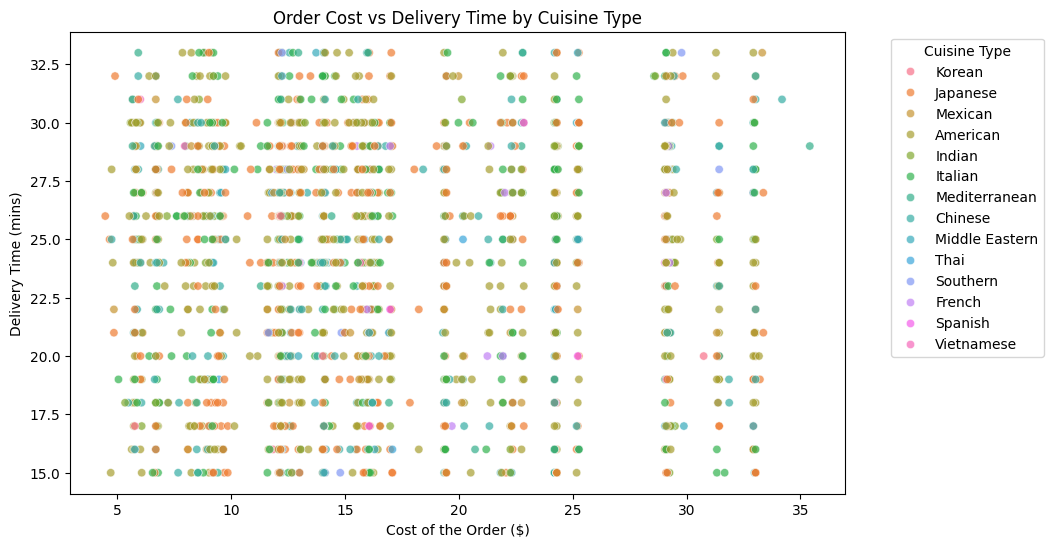

In [899]:
#Setting the figure size and plotting the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='cost_of_the_order',
    y='delivery_time',
    hue='cuisine_type',
    alpha=0.7 # This parameter is required for transparency
)


plt.title('Order Cost vs Delivery Time by Cuisine Type')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Delivery Time (mins)')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05,1))
plt.show()

### Observations:
1) The scatterplot displays a relationship between cost of the order and delivery time for various cuisines.

2) Cuisine types are clustered between the cost of 5 USD and 20 USD along the x axis.Proceeding further the clustered cuisines points are less dense and remain individually visible as the costs rises towards 35 USD and beyond.

3) The spread of clustered of data points along the y axis is not uniform. The points are clustered from the delivery time of 15 mins to 32.5 mins.

4) The main region of cluster is between the costs of 5 USD and 20 USD as per the costs of the order and as per the delivery time it goes from 15 minutes to 32.5 minutes for all types of cuisines.

5) Korean , Spanish , Vietnamese , French , Southern , Thai ,Mediterranean, Middle Eastern are less prominent whereas the Japanese , Indian, American , Italian , and Chinese are highly prominent across the plot.

6) There are very less orders that are less than the cost of 5 USD and above the cost of 35 USD. Only 5-7 orders are below the cost of 5 USD and a single order above the cost of 35 USD.

# Does food preparation time impact delivery time differently for different days of the week?

<Figure size 1000x600 with 0 Axes>

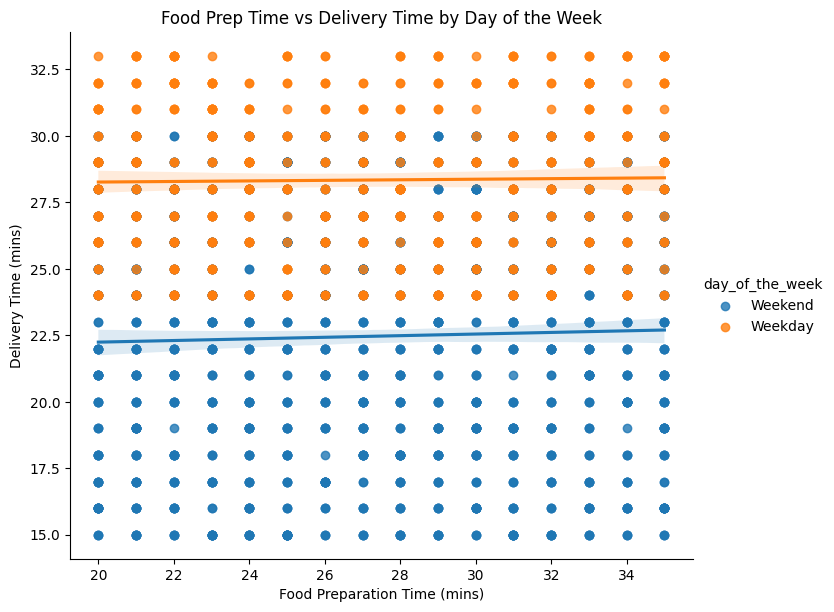

In [900]:
# Setting the size and plotting the lmplot
plt.figure(figsize=(10,6))
sns.lmplot(
    data=df,
    x='food_preparation_time',
    y='delivery_time',
    hue='day_of_the_week',
    height=6,
    aspect=1.2
)

plt.title('Food Prep Time vs Delivery Time by Day of the Week')
plt.xlabel('Food Preparation Time (mins)')
plt.ylabel('Delivery Time (mins)')
plt.show()

### Observations:

1) Weekday orders (orange dots) dominate the upper portion of the graph, with delivery times ranging from approximately 25-33 minutes, suggesting weekdays experience longer overall delivery times

2) Weekend orders (blue dots) dominate the lower portion of the graph, with delivery times ranging from 15 minutes to 23 minutes , which suggests that shorter delivery times during weeekends.'

3) Food preparation time remains in the same range for both day types (Weekday and weekend) which is basically from 20 minutes to 35 minutes.

4) Both the regression lines of weekday and weekend have a positive slope indicating the increased food preparation time also leads to higher deliver time.

5) On weekend, on a single delivery around 10 minutes can be saved which can contribute to more successful order deliveries across the weekend.

# Which cuisine type has the highest average cost on each day of the week?

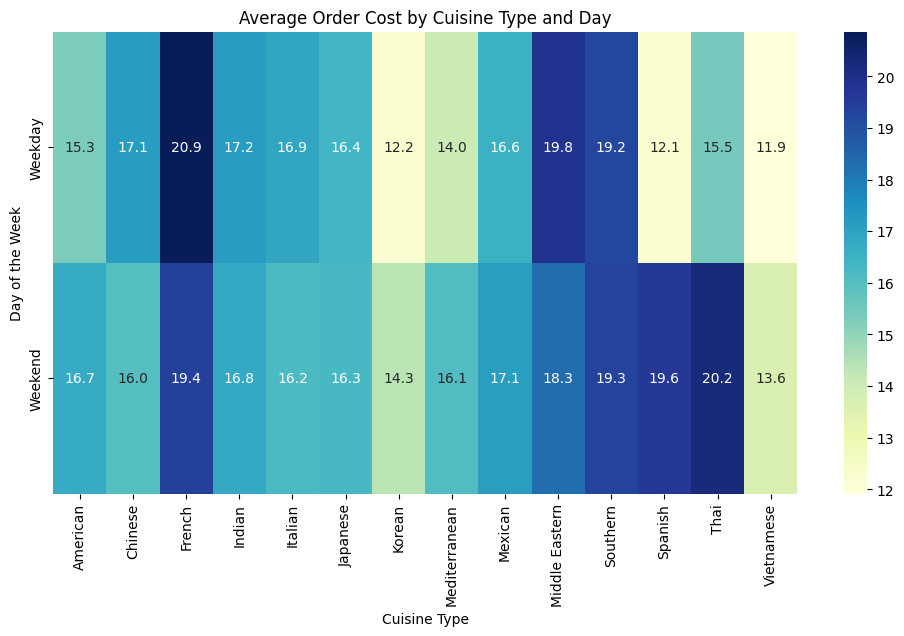

In [901]:
avg_cost = df.groupby(['day_of_the_week', 'cuisine_type'])['cost_of_the_order'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(
    avg_cost.pivot(index='day_of_the_week', columns='cuisine_type', values='cost_of_the_order'),
    annot=True, fmt=".1f", cmap="YlGnBu"
)
plt.title('Average Order Cost by Cuisine Type and Day')
plt.xlabel('Cuisine Type')
plt.ylabel('Day of the Week')
plt.show();

###Observations:

1) Vietnamese cuisine has the lowest order costs across weekend adn weekday which is 13.6 USD and 11.9 USD respectively.

2) American cuisine has the highest average costs across both weekend and weekday which is 16.7 USD and 15.3 USD respectively.

3) Average costs for 57% of the cuisines which are Vietnamese, Thai ,Spanish,Southern,Mexican , Mediterranean , Korean and American are more than there respective weekday costs.

4) Average costs for ~43% of the cuisines which are Middle Eastern, Japanese, Italian , Indian , French and Chinese have a higher average order costs across the weekdays as compared to there respective weekend counterparts.

5) Korean and Mediterranean cuisines display similar pricing patterns with relatively lower costs (12.2-16.0 range), suggesting these are more budget-friendly options regardless of the day

6) French cuisine maintains relatively high costs throughout the week, with 20.9 on weekdays and 19.4 on weekends, showing less variation between day types compared to other cuisines

7) American, Chinese, and Italian cuisines show moderate and stable pricing patterns (15.3-17.2 range) across both weekdays and weekends, suggesting these are mid-tier options with consistent demand and pricing throughout the week

# Do ratings vary by cuisine and day of the week?

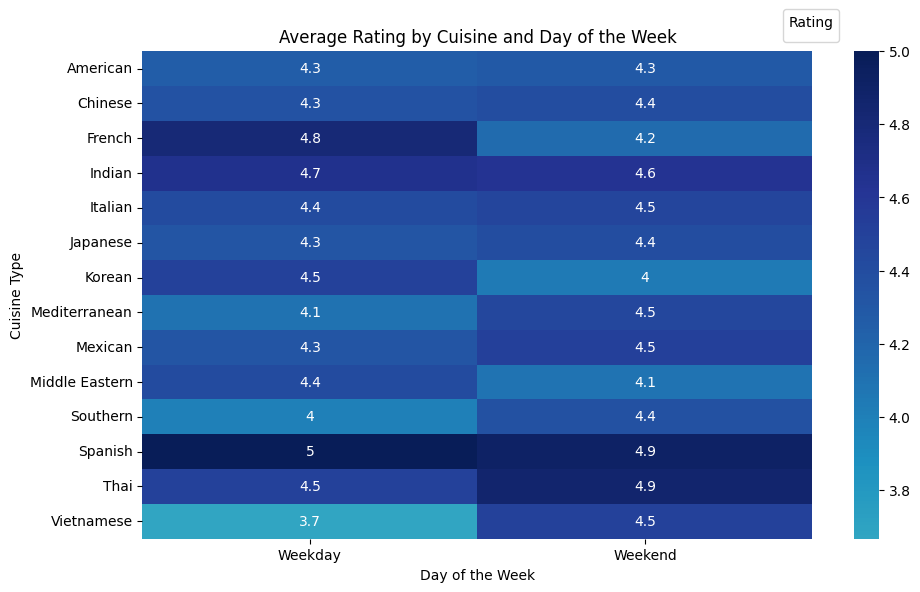

In [902]:
# Using the group-by command for grouping the data based on cuisine and day of the week, and calculating the mean based on rating
summary = (
    df.groupby(['cuisine_type', 'day_of_the_week'])['rating']
    .mean().reset_index()
)

# Setting the plot size and plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    summary.pivot(index='cuisine_type', columns='day_of_the_week', values='rating'),
    annot=True, cmap='YlGnBu', center=3.5
)
plt.title('Average Rating by Cuisine and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.legend(bbox_to_anchor=(1.05, 1.1), title='Rating')
plt.tight_layout()
plt.show();


###Observations:

1) Vietnamese cuisine has the lowest rating across weekday which is 3.7 but a higher average rating across weekend which is 4.5.

2) American cuisine displays equal average rating across both weekend and weekday which is 4.3.

3) Spanish cuisine achieves the highest customer satisfaction with a perfect rating of 5.0 on weekdays and 4.9 on weekends, making it the top-rated cuisine type across both day categories

4) Vietnamese cuisine shows the most significant rating improvement on weekends (4.5) compared to weekdays (3.7), representing an increase of 0.8 points and suggesting better service quality or customer experience during weekends

5) French cuisine demonstrates inconsistent performance with a relatively high rating of 4.8 on weekdays but dropping to 4.2 on weekends

6) Korean and Middle Eastern cuisines show contrasting weekend patterns - Korean drops from 4.5 to 4.0, while Middle Eastern drops from 4.4 to 4.1.

7) Thai and Chinese cuisines maintain the most consistent ratings across both day types (Thai: 4.5 on both days, Chinese: 4.3 to 4.4)



# Which combination of cuisine type, order cost, and prep time leads to the highest ratings?

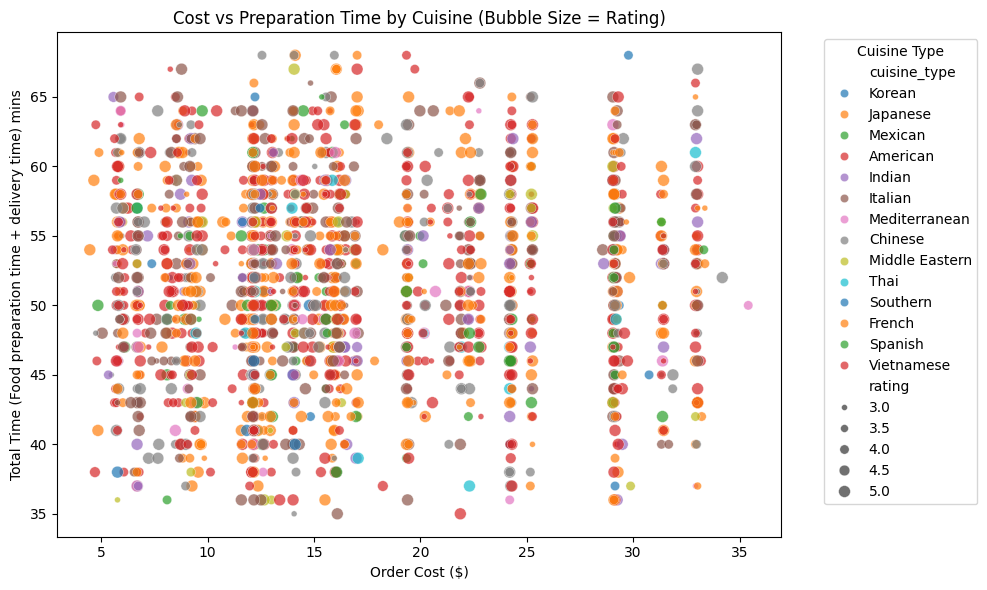

In [903]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Setting the plot size and plotting the scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='cost_of_the_order',
    y='total_time',
    hue='cuisine_type',
    size='rating',
    alpha=0.7,
    palette='tab10'
)

plt.title('Cost vs Preparation Time by Cuisine (Bubble Size = Rating)')
plt.xlabel('Order Cost ($)')
plt.ylabel('Total Time (Food preparation time + delivery time) mins')
plt.legend(bbox_to_anchor=(1.05, 1), title='Cuisine Type')
plt.tight_layout()
plt.show()


###Observations:

1) This plot visualises four variables at the same time.This plot visualises Order cost Vs Total Time wherein the coloured bubbles indicate the cuisine type and size of bubble indicate the rating.

2) Order cost varies across the 5 USD to 35 USD. The total time varies across the range of 35 minutes to 70 minutes.

3) Total time (food preparation + delivery) ranges from approximately 35-70 minutes, with the majority of orders clustered in the 45-60 minute range, indicating that most customers experience relatively consistent end-to-end service times

4) Lower cost of orders i.e between 5 USD and 20 USD includes all types of cuisines and these cuisine clusters are centered around this range of costs only wherein the total time range remains the same from 35 minutes and 70 minutes.

5) High ratings (larger bubbles of 4.5-5.0) are distributed uniformly across all cost levels and time ranges.

6) There are very less orders where the cost goes beyond 35 USD and beyond the time of 70 minutes indicating the spectrum of such orders is less varied.


# Do certain cuisines manage to achieve higher ratings despite longer total service times, especially for high-cost orders?

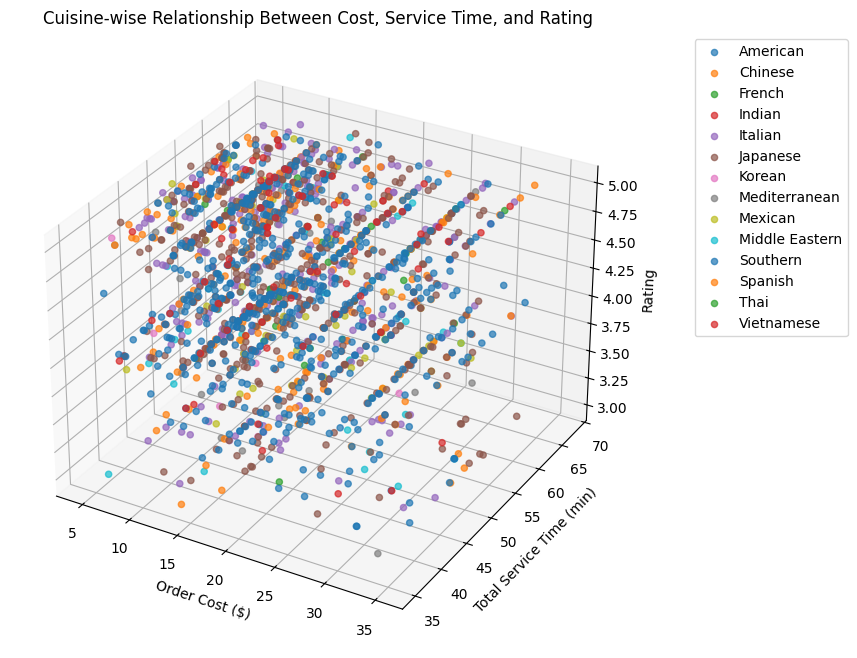

In [904]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Create a new feature: total service time
df['total_service_time'] = df['food_preparation_time'] + df['delivery_time']


# Plotting the 3d scatter plot for visualizing the 4 variables within the plot
for cuisine, subset in df.groupby('cuisine_type'):
    ax.scatter(
        subset['cost_of_the_order'],
        subset['total_service_time'],
        subset['rating'],
        label=cuisine,
        alpha=0.7
    )

ax.set_xlabel('Order Cost ($)')
ax.set_ylabel('Total Service Time (min)')
ax.set_zlabel('Rating')
ax.set_title('Cuisine-wise Relationship Between Cost, Service Time, and Rating')
ax.legend(bbox_to_anchor=(1.1, 1))
plt.show()


### Observations:

1) The data points form a dense cluster primarily in the mid-range zone (order cost $10-25, service time 45-60 minutes, ratings 4.0-5.0)

2) Ratings are concentrated in the 4.0-5.0 range across all order costs and service times, demonstrating consistently high customer satisfaction, with very few orders falling below the 3.5 rating threshold

3) The vertical distribution shows that cuisine types are evenly spread across all three dimensions, with no single cuisine dominating specific cost-time-rating combinations,

4) Higher-cost orders ($25-35) are distributed across the entire service time spectrum (40-70 minutes) with increment in ratings across the vetical stack.

5) Lower-rated orders (3.0-3.5 range) appear as isolated outliers scattered throughout the cost and time ranges,

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [905]:
# Write the code here

# Group by restaurant name and calculate the count of ratings and the average rating
restaurant_summary = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Rename the columns for better understanding of data
restaurant_summary.rename(columns={'count':'count_of_restaurants','mean':'average_rating'},inplace=True)

# Filter for restaurants with a rating count greater than 50 and an average rating greater than 4
promotional_restaurants = restaurant_summary[(restaurant_summary['count_of_restaurants']>50) & (restaurant_summary['average_rating']>4.0)]

# Sorted values according to the order count
eligible_restaurants = promotional_restaurants.sort_values(by='count_of_restaurants',ascending=False)

# Display the restaurants that fulfill the criteria
print("Restaurants eligible for the promotional offer:")
display(eligible_restaurants)

Restaurants eligible for the promotional offer:


restaurant_name  count_of_restaurants  average_rating
136                Shake Shack                   219        4.168950
153          The Meatball Shop                   132        4.689394
21           Blue Ribbon Sushi                   119        4.134454
20   Blue Ribbon Fried Chicken                    96        4.385417
109                       Parm                    68        4.073529
121           RedFarm Broadway                    59        4.169492
122             RedFarm Hudson                    55        4.109091

#### Observations:
1) We have 7 such restaurants where conditions of rating count being greater than 50 and average rating being greater than 4 is getting fulfilled.

2) Highest order count is for the "Shake Shack" restaurant with the count being 219 with the average rating of 4.16

3) Next highest order count is of "The Meatball Shop" with an order count of 132 with an average rating of 4.68

4) Restaurant "Blue Ribbon Sushi" has a order count of 119 and average rating of
4.13

5) Restaurants "Shack Shack", "The Meatball Shop" and "Blue Ribbon Sushi" have the order count of above 100 and rating above
4.1

6) Rest of the four restaurants "Blue Ribbon Fried Chicken", "Parm" , "RedFarm Broadway", "RedFarm Hudson" all have a order count below 100, which are 96, 68 , 59 , 55 respectively.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [906]:
# Write the code here

# Bool series of the orders where the order amount is greater than 20 USD
df['orders_above_20USD'] = df['cost_of_the_order']>20
order_count_above_20_usd = df[df['orders_above_20USD']]['restaurant_name'].count()


# Extract the column of the cost_of_the_order from the bool series and calculate sum using sum() function and then multiply with 0.25
revenue_after_25pcent_charge = df[df['orders_above_20USD']]['cost_of_the_order'].sum()*0.25
print(f"Revenue of orders above 20 USD:{revenue_after_25pcent_charge: .2f} USD, count:{order_count_above_20_usd}")


# Add the condition of order above 5 USD and orders below 20 USD to prevent duplicate revenue addition
df['orders_above_5USD'] = (df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)
order_count_above_5_usd = df[df['orders_above_5USD']]['restaurant_name'].count()


# Extract the column of the cost_of_the_order from the bool series and calculate sum using sum() function and then multiply with 0.15
revenue_after_15pcent_charge = df[df['orders_above_5USD']]['cost_of_the_order'].sum()*0.15
print(f"Revenue of orders above 5 USD and less than 20 USD:{revenue_after_15pcent_charge: .2f} USD, count:{order_count_above_5_usd}")


# calculate the total revenue
total_revenue = revenue_after_25pcent_charge + revenue_after_15pcent_charge
print(f"Total revenue across all orders:{float(total_revenue): .2f} USD")

Revenue of orders above 20 USD: 3688.73 USD, count:555
Revenue of orders above 5 USD and less than 20 USD: 2477.58 USD, count:1334
Total revenue across all orders: 6166.30 USD


#### Observations:
1) The net revenue generated across all orders is 6166.303 USD.

2) Orders above the amount of 20 USD have a cost of 3688.73 USD and have a frequency of 555.

3) Orders above the amount of 5 USD and below or equal to 20 USD have a cost of 2477.58 USD and have a frequency of 1334.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [907]:
# Write the code here

# calculating the total time for further processing
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

# Getting the bool series based on the condition entered
df['time_above_60mins'] = df['total_time']>60

# Getting the percentage of orders
percentage_of_orders = (df[df['time_above_60mins']].shape[0] / df.shape[0]) * 100

print(f"Percentage of orders where total time to deliver the food is greater than 60 minutes:{percentage_of_orders: .2f} minutes")


Percentage of orders where total time to deliver the food is greater than 60 minutes: 10.54 minutes


#### Observations:
1) Out of 1898 orders , 10.53% orders are taking more than 60 minutes to get delivered.

2) This translates to approximately 200 orders (10.53% of 1898).


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [908]:
# Write the code here

# Grouping the data based on the day of the week and calculating the mean of the delivery time
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()


print("Mean delivery time by day of the week:")
print(mean_delivery_time_by_day)

Mean delivery time by day of the week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
1) Mean delivery time during weekdays is 28.34 minutes whereas the mean delivery time during weekends is 22.47 minutes.

2) This means for every order on weekends, rider is saving approximately 6 minutes as compared to delivery time during weekdays.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

#### Univariate Analysis

*  The dataset primarily represents customer order behaviour for online food deliveries in New York.

* The averge rating value across the dataframe is 4.37, which suggests that the overall optimistic user satisacton levels.

* Order costs show significant variation with the inclusion of both low and high end resturant options available.

* A select few cuisines have a higher degree of user preference such as the American , Japanese and Italian.

* The distribution of preparation times is highly varied with some restaurants have a quick preparation time while some have long times.

* Weekend orders have a higher frequency showing customer requirement of food ordering during weekends as compared to weekdays.

* Customers have shown a preference for low costs orders due to high order count as compared to low order count of the high cost orders.

* Highest count of orders with food preparation time between 20 and 22 minutes is 135 orders.Overall, the food praparation time order count for every time period range range stays above 100 with the highest being 135. This means that customer prefers that cuisines/food also which have high food preparation time.

* In case of delivery times, customer prefer the food which has a delivery time between 24 and 25 minutes. Orders having a delivery time less than these have low order frequency count reaching upto 90 and the orders taking more time to get delivered than 24-25 minutes have also less order count reacching upto 60.

* The "Shake Shack" restaurant has the highest order count (250) and after that the order count for restaurants gradually decreases.

#### Bi-Variate Analysis

* Cost of order vs delivery time : There is no strong relationship between order cost and delivery time.This implies that higher delivery time does not directly correlatw with higher costs.

* Rating Vs Total Time (Food Preparation Time + Delivery time) : There is no strong correlation between Rating and Total Time. There is a slight weak negative correlation where the increased total time can weakly negatively affect the rating.

* Deivery time vs Food Preparation time : There is no direct correlation between delivery time and food preparation time. But there is only a slight weak upward trend which speaks that increase in food preparation time can lead to increased delivery time as well.

* Cost of the order vs Food preparation Time: There is no strong relationship between order costs and food preparation time.There is a weak positive correlation between order costs and food preparation time and there are very high number of orders for low order costs across the range of food preparation times and order count is less for high cost order across the range of food preparation time.

* Rating Vs Order Cost : No strong linear relationship between the rating and order costs. There is a slight upward trend , wherein the increased order cost can cause higher rating but this trend is weak and will not have a significant impact on the orders.

* Cuisine type Vs Order Costs : While all cuisines share a common order concentration around $10-16 (median: $14), Mexican, Indian, Mediterranean, Chinese, Middle Eastern, Thai, and Southern cuisines demonstrate higher premium order potential (>$40), offering greater revenue opportunities than Korean, Japanese, American, Italian, French, and Spanish cuisines

* Day of the week Vs food preparation time : Preparation time shows no significant variation between weekdays and weekends (median: 27 minutes, range: 20-34 minutes), indicating consistent kitchen performance across all days.

* Day of the week Vs Delivery time : Delivery times are consistently 5-7 minutes faster on weekends (median: 22.5 minutes, range: 15-30 minutes) than weekdays (median: 27.5 minutes, range: 24-32.5 minutes), suggesting reduced traffic congestion improves delivery efficiency.

* Cuisine Type Vs Average Rating : Spanish , Thai and Indian cuisines have received the highest average rating and lowest avergae rating is for the Korean cuisine.

* Day of the week Vs Rating : Weekend orders receive marginally higher customer satisfaction (weekend median: 4.5 vs. weekday median: 4.0, both with Q3 at 5.0), showing a negatively skewed distribution toward maximum ratings on weekends compared to positively skewed weekday ratings, likely reflecting faster delivery times and improved service experience during weekend periods.

* Day of the week Vs Order Cost : Both the weekend and weekday have the same boxplot with the weekday having higher order costs around 35 USD.

* Cuisine Type Vs Total Time (Food Preparation time + Delivery time) : Most customers experience total wait times of 50-55 minutes regardless of cuisine choice (64% of cuisines clustered around 25-27.5 minute delivery + 27.5 minute preparation), except Korean orders which are fulfilled 10 minutes faster at ~45 minutes, while Southern and Thai orders extend beyond 55 minutes due to longer kitchen processing

* Day of the week Vs Ratings : Customer ratings show consistent median satisfaction of 4.5 across weekdays and weekends, but weekends maintain higher service quality standards with no ratings below 4.0, while weekdays occasionally drop to 3.0, revealing better operational consistency during weekend service

* Order categorization across low , medium and high cost categories : maximum orders fall under the category of medium costs only i.e 50.3% of the orders have a cost greater than 12 USD and less than 22 USD. Above 22 USD are the high cost orders having a percentage of 25.9% whereas the low cost orders have a percentage of 23.8%.

* Order categorization in less time , medium time andlong time categories : Orders which take a long time have to reach customers have the largest percentage of orders at 56% taking more than 50 minutes, orders which take a medium time to reach customers have a percentage of 0.2% whereas the orders which take medium time to reach customers have a percentage of 43.9%.

* Cuisine Type Vs Day of the week : WAmerican cuisine maintains market leadership throughout the week (weekday: 169 orders, weekend: 415 orders), followed consistently by Japanese (135→ (approx) 270) and Italian (91→~182), while specialty cuisines (Korean, Spanish, Vietnamese) remain marginal despite weekend growth rates reaching 11x, highlighting a clear preference hierarchy that persists regardless of day type.

* Restaurant name vs Cuisine Type : American cuisine dominates FoodHub's restaurant network with 22.9% market share (41 restaurants), followed by Italian (17.3%), Japanese (16.2%), and Chinese (8.9%), while specialty cuisines like French, Mediterranean, Southern, Spanish, Korean, and Vietnamese remain severely underrepresented with minimal restaurant availability

* Day of the week Vs Cuisine Type : Weekend sales outperform weekdays at 132 restaurants (74%) versus only 46 showing weekday advantages, with popular venues like Shake Shack experiencing 40-60% weekend increases (140+ vs. 80-100 orders), confirming the universal weekend demand surge observed across all cuisine types


#### Multi-Variate Analysis

* Order Cost Vs Delivery Time by Cuisine Type:  Order behavior clusters tightly around the 5 USD - 20 USD cost range with uniform 15-32.5 minute delivery times across all cuisines, where popular cuisines (Japanese, Indian, American, Italian, Chinese) create dense scatter plot concentrations while specialty cuisines remain sparse, and outlier orders (less than 5 USD  or greater than 35 USD) are negligible (totaling 6-8 orders)

* Food preparation time Vs  Delivery Time by Day of the week : Food preparation time is consistent across weekdays (20-35 min) and weekends (20-35 min), but delivery times are 10 minutes faster on weekends (15-23 min) compared to weekdays (25-33 min), with both showing positive prep-delivery correlations

* Average Order Cost by Cuisine Type and day : Average order costs show minimal day-to-day variation (USD 11.90- USD 20.90 range) with no consistent weekend pricing premium—57% of cuisines (Vietnamese, Thai, Spanish, Southern, Mexican, Mediterranean, Korean, American) cost slightly more on weekends while 43% (Middle Eastern, Japanese, Italian, Indian, French, Chinese) cost more on weekdays—suggesting FoodHub's platform pricing remains stable regardless of demand fluctuations, with French cuisine commanding the highest consistent premium (USD 20.90 weekday, USD 19.40 weekend) and Vietnamese remaining the most budget-friendly option (USD 11.90 weekday, USD 13.60 weekend) throughout the week.

* Ratings by Cuisine and day : Cuisine ratings vary widely by day, with Spanish consistently highest (5.0 weekday, 4.9 weekend), Vietnamese showing the largest weekend improvement (+0.8 to 4.5), Thai and Chinese maintaining stability (4.3-4.5), while French, Korean, and Middle Eastern decline on weekends (drops of 0.3-0.6 points).

* Cuisine , Order Cost, Preparation Time and Ratings : Customer ratings (4.5-5.0) remain consistently high across all cost levels (5 USD - 35 USD), total times (35-70 minutes), and cuisine types, with most orders concentrated at $5-20 and 45-60 minutes, indicating that satisfaction is independent of price or speed—consistent baseline service delivery matters more than premium features

* Cuisine-wise Relationship Between Cost, Service Time, and Rating: Customer satisfaction (4.0-5.0 ratings) remains consistently high across all order costs (10 USD - 35 USD), service times (40-70 minutes), and cuisine types, with the majority clustering at $10-25 and 45-60 minutes, while low ratings (3.0-3.5) appear only as scattered outliers, indicating that meeting baseline expectations for consistency matters more than premium speed or pricing for customer satisfaction.





### Recommendations:

### Univariate Analysis Recommendations

*  Since customer satisfaction is already high (average rating 4.37), FoodHub should focus on maintaining service quality consistency through ongoing restaurant performance tracking and reward systems.

* With American, Japanese, and Italian cuisines being the most preferred, allocate more marketing visibility and promotional slots for these cuisines while introducing targeted campaigns to increase exposure for underperforming cuisines.

* FoodHub can introduce pricing segmentation (e.g., “Budget Eats,” “Mid-Range Meals,” “Premium Dining”) to target customers based on spending capacity.

* To improve reliability, introduce robust tracking systems for the food and set the maximum standard time for any dish to get prepared.

* Due to higher demands on weekends , company can introduce more delivery partners during weekends to cater to the peak delivery times.

* Restaurants should prioritize quality and should not deliver sub-standard food within specific ETA's.

* To balance time and operational feasibility, company can set 24-25 minutes as the optimal delivery time.

* Some restaurants such as "Shake Shack" has the highest demand so company should introduce loyalty points and survey based engagement programs to introduce benefits to customers.


### Bi-Variate Analysis Recommendations:

1) Cost vs Delivery Time: Since no strong relationship exists, introduce dynamic delivery fee optimization to avoid unnecessary customer price sensitivity for longer delivery times.

2) Rating vs Total Time: To counteract the weak negative correlation, improve customer communication about estimated total wait times and progress notifications to reduce dissatisfaction due to perceived delays.

3) Delivery Time vs Preparation Time: Enable real time tracking for the delivery person to receive proper notification of the order progress from the restaurant side.

4) Order Cost vs Preparation Time : Introduce batch preparation such that time can be saved.

5) Rating vs Order Cost: Because ratings slightly increase with order cost, premium restaurants should highlight quality assurance and chef reputation to reinforce perceived value.

6) Cuisine Type vs Order Cost: Introduce bundled cuisine types which can market high potential cuisines.

7) Day of Week vs Delivery Time : Improve routing algorithms such that faster deliveries are possible with greater customer satisfaction which can increase the number of deliveries per weekday.

8) Cuisine Type vs Average Rating: Introduce promotional offers to leverage strong sentiment for high rated cuisines while taking surveys and feedback for low rated cuisines.

9) Day of Week vs Rating: To decrease weekday customer dissatisfaction, introduce weekday offers and discounts for better rating and customer experience.

10) Day of Week vs Order Cost: Weekday combo offers and coupon codes offers which can satisfy the high cost during weekdays with equivalent user benefits.

11) Cuisine Type vs Total Time: Highlight the time before-hand to the customer for the meal they have selected and highlight the low-time required cuisines which can boost the sales of those cuisines.

12) Order Category Analysis (Cost): Since medium-cost orders dominate (50.3%), design tiered loyalty rewards that give proportionally higher cashback on medium-cost orders to drive continued mid-tier engagement.

13) Order Category Analysis (Time): For long-time deliveries (56%), ensure clear expectation setting and status updates to preserve satisfaction even when wait times are long.

14) Cuisine Type vs Day of Week: Since American, Japanese, and Italian cuisines dominate across all days, expand platform partnerships in these cuisines and invest in specialty cuisine promotions (Korean, Spanish, Vietnamese) to diversify demand.

15) Day of the week and cuisine type : Extra delivery partners should be employed such that weekend surges can be catered and some cuisines can be a bundled pack to boost the market of that cuisine across weekend and weekday.

16) Restaurant Name vs Cuisine Type: With American cuisine holding 22.9% share, focus expansion on underrepresented cuisines through onboarding incentives or featured promotions to broaden market appeal.


### Multi Variate Analysis Recommendations:

1) Food Preparation vs Delivery Time by Day: Replicate weekend delivery routing models on weekdays to minimize time gaps; ensure kitchen operations and delivery coordination systems share real-time data.

2) Average Order Cost by Cuisine and Day: Because pricing remains stable across days, maintain consistent menu pricing policies but use event-based dynamic pricing for special occasions or holidays.

3) Order Cost vs Delivery Time by Cuisine: Increase the offerings within the bracket of 5 USD to 20 USD since max orders lie within this range. Reduction on promotions and marketing of outliers which have a negligible say in volume will route the revenue to required areas.

4) Ratings by Cuisine and Day: Since some cuisines improve or decline on weekends, conduct weekly restaurant performance reviews to identify causes (e.g., staffing, ingredient quality) and deploy service improvement training.

5) Cuisine, Order Cost, Preparation Time, and Rating Relationship: Since cuisine , order cost , preparation time and rating relation is stable , focussing packaging, communication and forging long term customers relations can prove beneficial.

6) Cuisine-wise Cost, Service Time, and Rating Relationship: Continuous monitoring performance dashboards must be implemented to analyse the performance of company's partners restaurants.